<a href="https://colab.research.google.com/github/Youssef-S-Ahmed/Car-Price-Prediction-/blob/main/Car_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
df = pd.read_csv("car data.csv")
df

Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual      0  
2         Dealer       Manual      0  
3         Dealer       Manual      0  
4         Dealer       Manual      0  
..           ...          ...    ...  
296       Dealer       Manual      0  
297       Dealer       Manual      0  
298       Dealer       Manual      0  
299       Dealer       Manual      0  
300       Dealer       Manual      0  

[301 rows x 9 columns]

Understanding our Data


1.   Car_Name : Brand
2.   Year : Model Year
3.   Selling Price
4.   Present Price : car Price at Present Time
5.   Driven KM : Distance Covered By Car
6.   Fuel Type
7.   Selling Type : wether by Dealer or owner
8.   Transimition : Manual or Automatic
9.   Owner : how many number of pervious Owners for this car



In [ ]:
df.sample(10)

Car_Name  Year  Selling_Price  Present_Price  Driven_kms  \
23            alto k10  2014           2.50           3.46       45280   
203                i10  2011           2.95           4.60       53460   
251               city  2013           5.00           9.90       56701   
259              amaze  2014           3.90           7.00       36054   
133  Bajaj Avenger 220  2016           0.72           0.95         500   
19                 sx4  2010           2.65           7.98       41442   
216                eon  2016           2.90           4.43       12500   
299               city  2017          11.50          12.50        9000   
187   Honda CB twister  2013           0.25           0.51       32000   
66              innova  2017          19.75          23.15       11000   

    Fuel_Type Selling_type Transmission  Owner  
23     Petrol       Dealer       Manual      0  
203    Petrol       Dealer       Manual      0  
251    Petrol       Dealer       Manual      0  
259    Petrol       Dealer       Manual      0  
133    Petrol   Individual       Manual      0  
19     Petrol       Dealer       Manual      0  
216    Petrol       Dealer       Manual      0  
299    Diesel       Dealer       Manual      0  
187    Petrol   Individual       Manual      0  
66     Petrol       Dealer    Automatic      0

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

no null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Quantitative Cols
  1. Selling_price
  2. Present Price
  3. Driven_kms

Qualitative
  1. Car_name
  2. Fuel_Type
  3. Transmission
  4. Selling_Type

In [ ]:
df.describe()

Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

all mean > median which means data is Right Skewed

#Univariate Analysis
Target "Persent Price"

Distribution of Quantitative Data Using Histogram

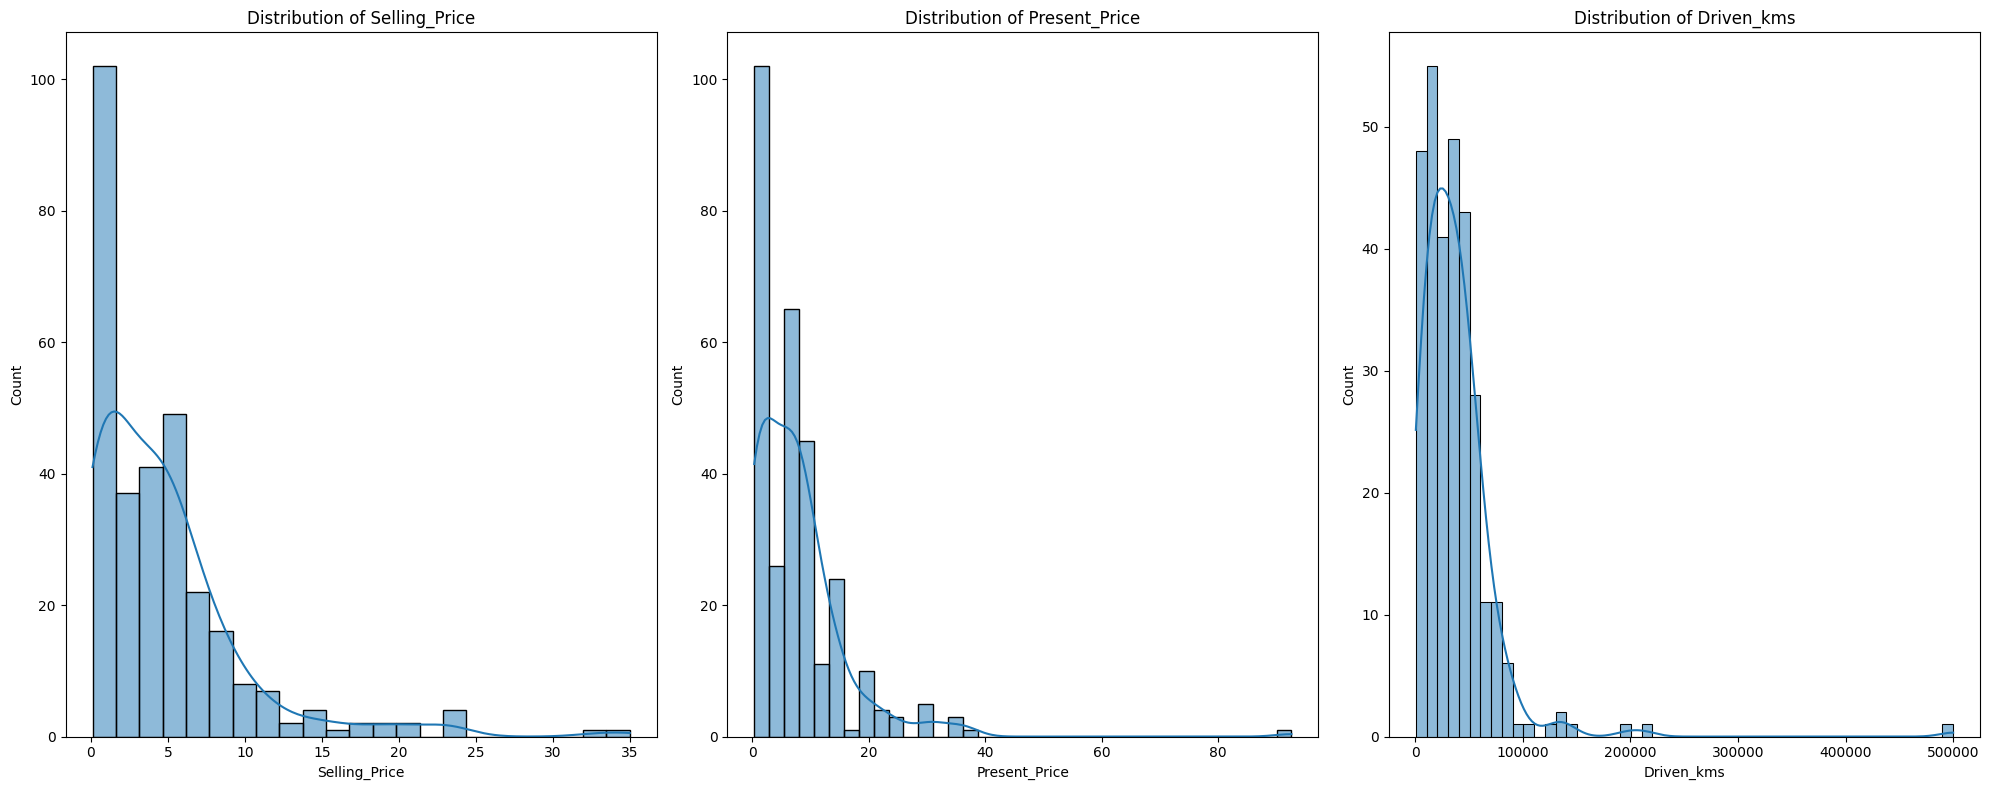

In [ ]:
plt.figure(figsize=(20,8))
for e,i in enumerate(df.columns[2:5]): #2,3,4 cols
  plt.subplot(1,3,e+1)
  plt.title("Distribution of "+i)
  sns.histplot(df[i],kde=True)
  plt.tight_layout()

<Axes: title={'center': 'Distribution of Owners'}, xlabel='Owner', ylabel='Count'>

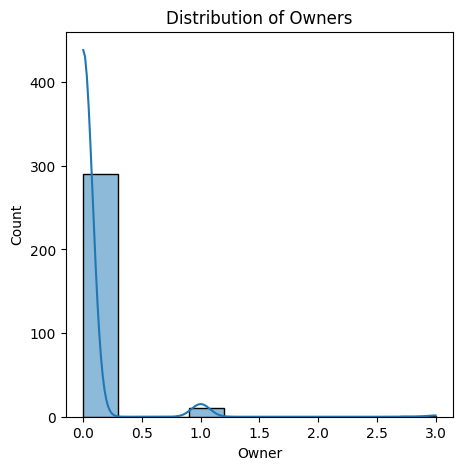

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Distribution of Owners")
sns.histplot(df.Owner,kde=True)

#Categorical Univariate

In [ ]:
px.bar(data_frame = df.Car_Name.value_counts(),
       title = 'Distribution of Car_Name')

Right Skewed

In [ ]:
px.bar(data_frame = df.Transmission.value_counts(),
       title = 'Distribution of Transmission')

In [ ]:
px.pie(data_frame = df , names = "Transmission" , title = "Percentage of Transimission")

86.7% of Cars in our Data are Manual Transmission

In [ ]:
px.bar(data_frame = df.Year.value_counts(),
       title = 'Distribution of Year')

left Skewed

most of cars Models Ranges from 2014 to 2016

In [ ]:
px.pie(data_frame = df , names = "Year" , title = "Percentage of Year Models")

2015 : 20.4%

2016 : 16.7%

2014 : 12.7%

In [ ]:
px.bar(data_frame = df.Fuel_Type.value_counts(),
       title = 'Distribution of Fuel_type')

In [ ]:
px.pie(data_frame = df , names = "Fuel_Type" , title = "Percentage of Fuel Type")

79.4% of Cars uses Petrol as Fuel

In [ ]:
px.bar(data_frame = df.Selling_type.value_counts(),
       title = 'Distribution of Selling_Type')

Most of Cars are Beining soled by Dealers

In [ ]:
px.pie(data_frame = df , names = "Selling_type" , title = "Percentage of Selling Type")

64.8% of cars are sold by Dealers

#Bivariate Analysis

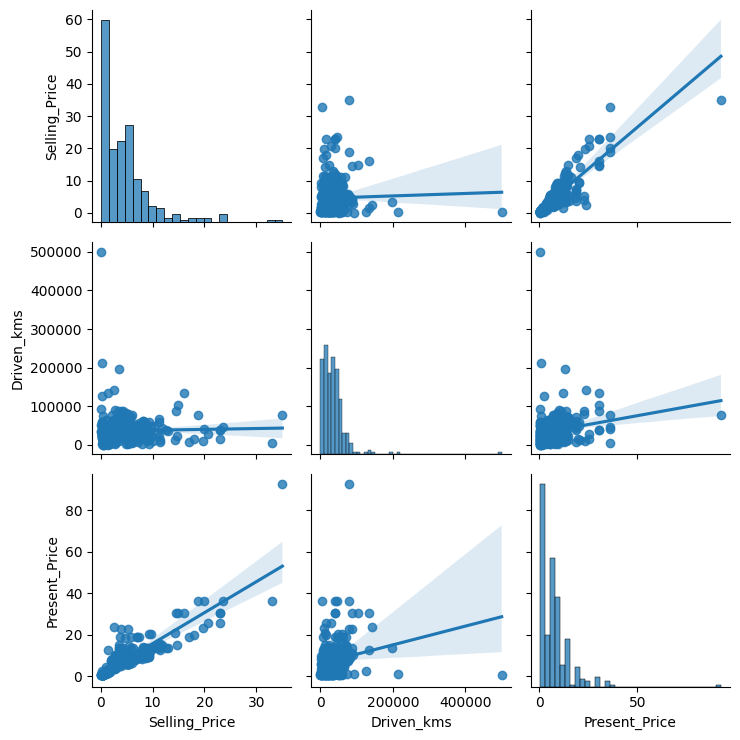

In [ ]:
corr = df[["Selling_Price", "Driven_kms","Present_Price"]]
sns.pairplot(corr,kind = 'reg')
plt.tight_layout()

Text(0.5, 1.0, 'correlation between numerical values')

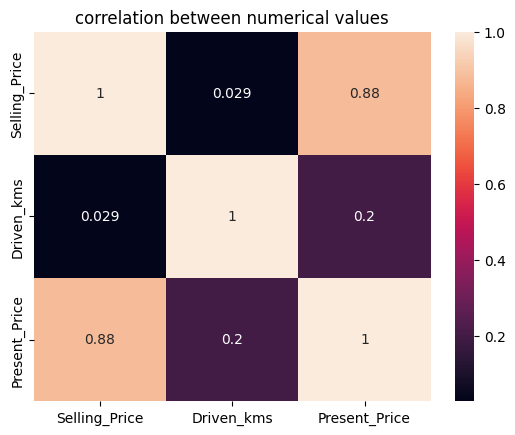

In [ ]:
#heatmap
sns.heatmap(corr.corr(), annot =True)
plt.title('correlation between numerical values')

1. Weak Relation between Driven_kms and Present State
2. Weak Relation between Selling Price and Driven_Kms
3. Strong +ve Relation Between Selling Price and Present Price

Checking on Outliers

In [ ]:
px.box(data_frame = df, x="Selling_Price")

In [ ]:
px.box(data_frame = df, x="Present_Price")

In [ ]:
UB = 25.39
df[df.Present_Price > UB].count()

Car_Name         10
Year             10
Selling_Price    10
Present_Price    10
Driven_kms       10
Fuel_Type        10
Selling_type     10
Transmission     10
Owner            10
dtype: int64

In [ ]:
df = df[df.Present_Price < UB]

In [ ]:
df[df.Present_Price > UB].count()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

**1. Car Name vs Selling Price**

In [ ]:
nameVselling = df.groupby("Car_Name", as_index=False)["Selling_Price"].sum().sort_values("Selling_Price",ascending = False)
nameVselling

Car_Name  Selling_Price
69                 city         192.90
71        corolla altis         114.93
93                verna          85.51
86               innova          71.25
68                 ciaz          67.25
..                  ...            ...
18     Hero  CBZ Xtreme           0.20
19   Hero  Ignitor Disc           0.20
24            Hero Hunk           0.20
29  Hero Super Splendor           0.20
3         Bajaj  ct 100           0.18

[97 rows x 2 columns]

In [ ]:
px.bar(data_frame = nameVselling, x="Car_Name", y="Selling_Price",
       title = 'Distribution of Car_Names & Selling Price')

City Cars sells with Total of 192.9$

**2. Car Name vs Present Price**

In [ ]:
nameVpresent = df.groupby("Car_Name", as_index=False)["Present_Price"].sum().sort_values("Present_Price",ascending = False)
nameVpresent

Car_Name  Present_Price
69                    city         306.59
71           corolla altis         281.32
93                   verna         130.60
86                  innova         109.84
68                    ciaz          87.81
..                     ...            ...
23  Hero Honda Passion Pro           0.51
2                Activa 4g           0.51
27      Hero Splender Plus           0.48
9       Bajaj Discover 100           0.47
3            Bajaj  ct 100           0.32

[97 rows x 2 columns]

In [ ]:
px.bar(data_frame = nameVpresent, x="Car_Name", y="Present_Price",
       title = 'Distribution of Car_Names & Present Price')

Top 3 at the Present Price are
1. City
2. Corolla
3. Verna

**1. Selling Price vs Driven_km**

In [ ]:
sellingVkm = df.groupby("Selling_Price", as_index=False)["Driven_kms"].mean().sort_values("Driven_kms",ascending = False).head(10)
sellingVkm

Selling_Price  Driven_kms
4            0.17    500000.0
10           0.31    213000.0
61           3.49    197176.0
38           1.50    135154.0
47           2.50     93640.0
0            0.10     92233.0
73           4.35     88000.0
63           3.51     75000.0
86           5.20     71000.0
64           3.60     70000.0

In [ ]:
px.pie(data_frame = sellingVkm, names = "Selling_Price" , values ="Driven_kms")

32.6% of cars with selling price 0.17 have Average of 500K Driven kms

**2. Present Price vs Driven_Km**

In [ ]:
presentVkm = df.groupby("Present_Price", as_index=False)["Driven_kms"].mean().sort_values("Driven_kms",ascending = False).head(10)
presentVkm

Present_Price  Driven_kms
142          23.73    142000.0
4             0.52    139000.0
119          12.35    135154.0
39            2.28    127000.0
27            1.05    121500.0
123          13.46    117588.0
112          10.21     90000.0
139          22.78     89000.0
115          11.00     87934.0
102           8.93     83000.0

In [ ]:
px.pie(data_frame = presentVkm, names = "Present_Price" , values ="Driven_kms")

12.5% of cars with Present Price 23.73 have Average of 142K Driven kms

**3. Selling price vs Transmission**

In [ ]:
sellingVtransmission = df.groupby("Transmission", as_index=False)["Selling_Price"].mean().sort_values("Selling_Price",ascending = False)
sellingVtransmission

Transmission  Selling_Price
0    Automatic       5.048621
1       Manual       3.812500

Average Selling Price of Automatic Cars is 5.048

**4. Present Price vs Transmission**

In [ ]:
presentVtransmission = df.groupby("Transmission", as_index=False)["Present_Price"].mean().sort_values("Present_Price",ascending = False)
presentVtransmission

Transmission  Present_Price
0    Automatic       9.126897
1       Manual       6.119038

Average Present Price of Automatice cars is 9.1268

**5. Selling price vs Owner**

In [ ]:
sellingVowner = df.groupby("Owner", as_index=False)["Selling_Price"].mean().sort_values("Selling_Price",ascending = False)
sellingVowner

Owner  Selling_Price
0      0       4.012446
2      3       2.500000
1      1       1.970000

Average Selling Price for "0" owner Car is 4.012

In [ ]:
px.pie(data_frame = sellingVowner, names = "Owner" , values ="Selling_Price")

Average selling Price for "0" owner car 4.012 and Comes with 47.3% of our Data

**6. Present price vs Owner**

In [ ]:
presentVowner = df.groupby("Owner", as_index=False)["Present_Price"].mean().sort_values("Present_Price",ascending = False)
presentVowner

Owner  Present_Price
2      3      23.730000
0      0       6.470288
1      1       3.316000

In [ ]:
px.pie(data_frame = presentVowner, names = "Owner" , values ="Present_Price")

Average Present Price For "3" Owners car is 23.73 & comes with 70.8% of our Data

**7.selling Price Vs Year**

In [ ]:
sellingVyear = df.groupby("Year", as_index=False)["Selling_Price"].mean().sort_values("Selling_Price",ascending = False).head(10)
sellingVyear

Year  Selling_Price
15  2018       9.250000
12  2015       5.035345
13  2016       4.896122
14  2017       4.888485
11  2014       3.950556
10  2013       3.151562
7   2010       3.138571
6   2009       2.816667
9   2012       2.807143
2   2005       2.487500

In [ ]:
px.pie(data_frame = sellingVyear, names = "Year" , values ="Selling_Price")

21.8% of Cars with Manfacture year of 2018 and Average Selling Price of 9.25

**Present Price Vs Year**

In [ ]:
presentVyear = df.groupby("Year", as_index=False)["Present_Price"].mean().sort_values("Present_Price",ascending = False).head(10)
presentVyear

Year  Present_Price
1   2004      12.350000
6   2009      10.601667
15  2018       9.830000
2   2005       9.485000
3   2006       9.057500
7   2010       8.740000
12  2015       6.929655
11  2014       6.247861
13  2016       6.166327
10  2013       6.077719

In [ ]:
px.pie(data_frame = presentVyear, names = "Year" , values ="Present_Price")

14.4% of cars with manfacture year 2004 & Average present price of 12.35

In [ ]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_Name       289 non-null    object        
 1   Year           289 non-null    datetime64[ns]
 2   Selling_Price  289 non-null    float64       
 3   Present_Price  289 non-null    float64       
 4   Driven_kms     289 non-null    int64         
 5   Fuel_Type      289 non-null    object        
 6   Selling_type   289 non-null    object        
 7   Transmission   289 non-null    object        
 8   Owner          289 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 22.6+ KB


<ipython-input-43-162ce45a9138>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df["Year"]

0     2014-01-01
1     2013-01-01
2     2017-01-01
3     2011-01-01
4     2014-01-01
         ...    
296   2016-01-01
297   2015-01-01
298   2009-01-01
299   2017-01-01
300   2016-01-01
Name: Year, Length: 289, dtype: datetime64[ns]

In [ ]:
year_selling = df[["Year","Selling_Price"]] # new list
year_selling = year_selling.set_index("Year") #set date as index
year_selling = year_selling.Selling_Price.resample(rule = "y").mean()
year_selling

Year
2003-12-31    1.300000
2004-12-31    1.500000
2005-12-31    2.487500
2006-12-31    1.437500
2007-12-31    0.160000
2008-12-31    1.002857
2009-12-31    2.816667
2010-12-31    3.138571
2011-12-31    2.375263
2012-12-31    2.807143
2013-12-31    3.151562
2014-12-31    3.950556
2015-12-31    5.035345
2016-12-31    4.896122
2017-12-31    4.888485
2018-12-31    9.250000
Freq: A-DEC, Name: Selling_Price, dtype: float64

In [ ]:
# plot time series graph
px.line(data_frame= year_selling)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
year_present = df[["Year","Present_Price"]] # new list
year_present = year_present.set_index("Year") #set date as index
year_present = year_present.Present_Price.resample(rule = "y").mean()
year_present

Year
2003-12-31     5.130000
2004-12-31    12.350000
2005-12-31     9.485000
2006-12-31     9.057500
2007-12-31     0.665000
2008-12-31     4.759571
2009-12-31    10.601667
2010-12-31     8.740000
2011-12-31     5.148053
2012-12-31     5.830000
2013-12-31     6.077719
2014-12-31     6.247861
2015-12-31     6.929655
2016-12-31     6.166327
2017-12-31     5.596364
2018-12-31     9.830000
Freq: A-DEC, Name: Present_Price, dtype: float64

In [ ]:
# plot time series graph
px.line(data_frame= year_present)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



#Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

#Linear Regression

In [ ]:
import statsmodels.api as sm

df["intercept"] = 1 # col is added for the linear Regression model
#OLS: Oridnary Least Square [taregt , [intercept ,feature]]
lm = sm.OLS(df['Selling_Price'], df[['intercept', 'Present_Price']])
result = lm.fit()
result.summary()

<ipython-input-49-2a0b78cea5c4>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     583.9
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           3.81e-71
Time:                        22:26:03   Log-Likelihood:                -609.61
No. Observations:                 289   AIC:                             1223.
Df Residuals:                     287   BIC:                             1231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.5215      0.184      2.835      0.005       0.159       0.884
Present_Price     0.5319      0.022     24.163      0.000       0.489       0.575
==============================================================================
Omnibus:                       61.073   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.103
Skew:                          -0.633   Prob(JB):                     3.26e-90
Kurtosis:                       8.711   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. P_Value < 0.05 so Feature ("Present Price") is Effective by R-Squared= 0.67
2. Intercept Coef = 0.5215 ("Start Price)
3. Present price Coef = 0.5319 which means that price of car increases by 0.5319
4. 67% of selling Price Depends on present Price and 33% for other Features

In [ ]:
data = df[["Present_Price","Selling_Price"]]
data

Present_Price  Selling_Price
0             5.59           3.35
1             9.54           4.75
2             9.85           7.25
3             4.15           2.85
4             6.87           4.60
..             ...            ...
296          11.60           9.50
297           5.90           4.00
298          11.00           3.35
299          12.50          11.50
300           5.90           5.30

[289 rows x 2 columns]

In [ ]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

#Splitting Data

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.25 , random_state=48)

#Training Simple linear Regression Model

In [ ]:
# create an instance
regressor = LinearRegression()

# training model using fit method
regressor.fit(x_train,y_train)

LinearRegression()

#Predicting Values

In [ ]:
y_pred = regressor.predict(x_test)
print(y_pred)

[ 1.28726993  3.69452815  1.45521818  3.67926013  1.07351761  0.95137343
  0.96664146  3.64363474  1.09234818  5.7811579   8.21895216  7.6133206
  1.91325885  0.95646277  5.47579745  0.96664146 11.33362876  1.65879181
  5.07373952  4.15256883 11.09951908  4.22890894  0.95137343  2.71737471
  5.47579745  4.55971609  7.68457137  6.59545243  1.11423234  0.98699882
  4.15256883  3.59274133  4.61569884  1.02262421  4.33069576  3.77086826
  4.50373335  1.45521818  1.19566179  5.47579745  2.44763964  5.21624106
  0.95646277  8.88056647  3.03291384  5.47579745  1.17530443  1.17021509
  4.79382577  4.6971283   1.10405366  0.95137343  7.66421401  3.59274133
  4.25435564  3.4146144   7.6133206   3.18050472  2.94639505  2.52397976
  1.19566179  0.95137343  4.50882269  5.47579745  0.96664146  1.19566179
  1.5824517   1.109143   11.09951908  1.1121966   1.07351761  1.85218676
  1.22619784]


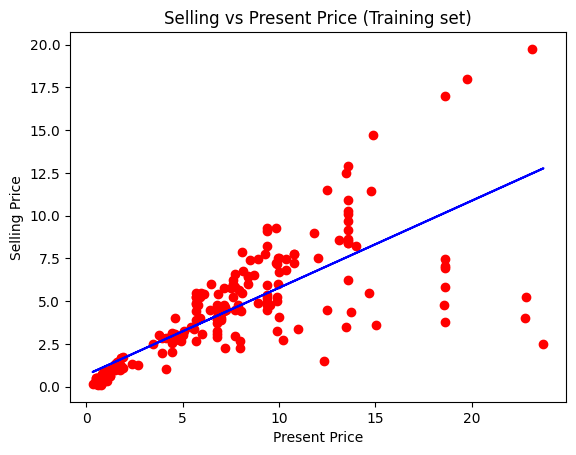

In [ ]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Selling vs Present Price (Training set)')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

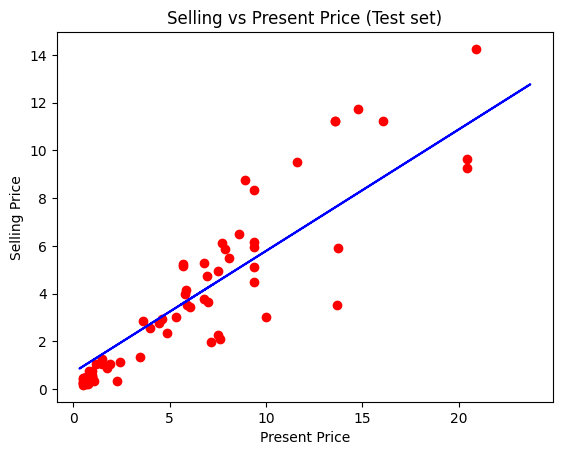

In [ ]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Selling vs Present Price (Test set)')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 2.2594375332746046
MAE: 1.1270522287852491
RMSE: 1.5031425525460334
R-squared: 0.8104848812136667


**LR of R2 = 81%**

#Second Trial

In [ ]:
df1 = df

In [ ]:
df1 = df1.drop(columns=['Car_Name'])
df1

Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0   2014-01-01           3.35           5.59       27000    Petrol   
1   2013-01-01           4.75           9.54       43000    Diesel   
2   2017-01-01           7.25           9.85        6900    Petrol   
3   2011-01-01           2.85           4.15        5200    Petrol   
4   2014-01-01           4.60           6.87       42450    Diesel   
..         ...            ...            ...         ...       ...   
296 2016-01-01           9.50          11.60       33988    Diesel   
297 2015-01-01           4.00           5.90       60000    Petrol   
298 2009-01-01           3.35          11.00       87934    Petrol   
299 2017-01-01          11.50          12.50        9000    Diesel   
300 2016-01-01           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  intercept  
0         Dealer       Manual      0          1  
1         Dealer       Manual      0          1  
2         Dealer       Manual      0          1  
3         Dealer       Manual      0          1  
4         Dealer       Manual      0          1  
..           ...          ...    ...        ...  
296       Dealer       Manual      0          1  
297       Dealer       Manual      0          1  
298       Dealer       Manual      0          1  
299       Dealer       Manual      0          1  
300       Dealer       Manual      0          1  

[289 rows x 9 columns]

In [ ]:
le = LabelEncoder()
df1['Fuel_Type'] = le.fit_transform(df1['Fuel_Type'])
df1['Selling_type'] = le.fit_transform(df1['Selling_type'])
df1['Transmission'] = le.fit_transform(df1['Transmission'])
df1['Year'] = le.fit_transform(df1['Year'])

In [ ]:
df1

Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  Selling_type  \
0      11           3.35           5.59       27000          2             0   
1      10           4.75           9.54       43000          1             0   
2      14           7.25           9.85        6900          2             0   
3       8           2.85           4.15        5200          2             0   
4      11           4.60           6.87       42450          1             0   
..    ...            ...            ...         ...        ...           ...   
296    13           9.50          11.60       33988          1             0   
297    12           4.00           5.90       60000          2             0   
298     6           3.35          11.00       87934          2             0   
299    14          11.50          12.50        9000          1             0   
300    13           5.30           5.90        5464          2             0   

     Transmission  Owner  intercept  
0               1      0          1  
1               1      0          1  
2               1      0          1  
3               1      0          1  
4               1      0          1  
..            ...    ...        ...  
296             1      0          1  
297             1      0          1  
298             1      0          1  
299             1      0          1  
300             1      0          1  

[289 rows x 9 columns]

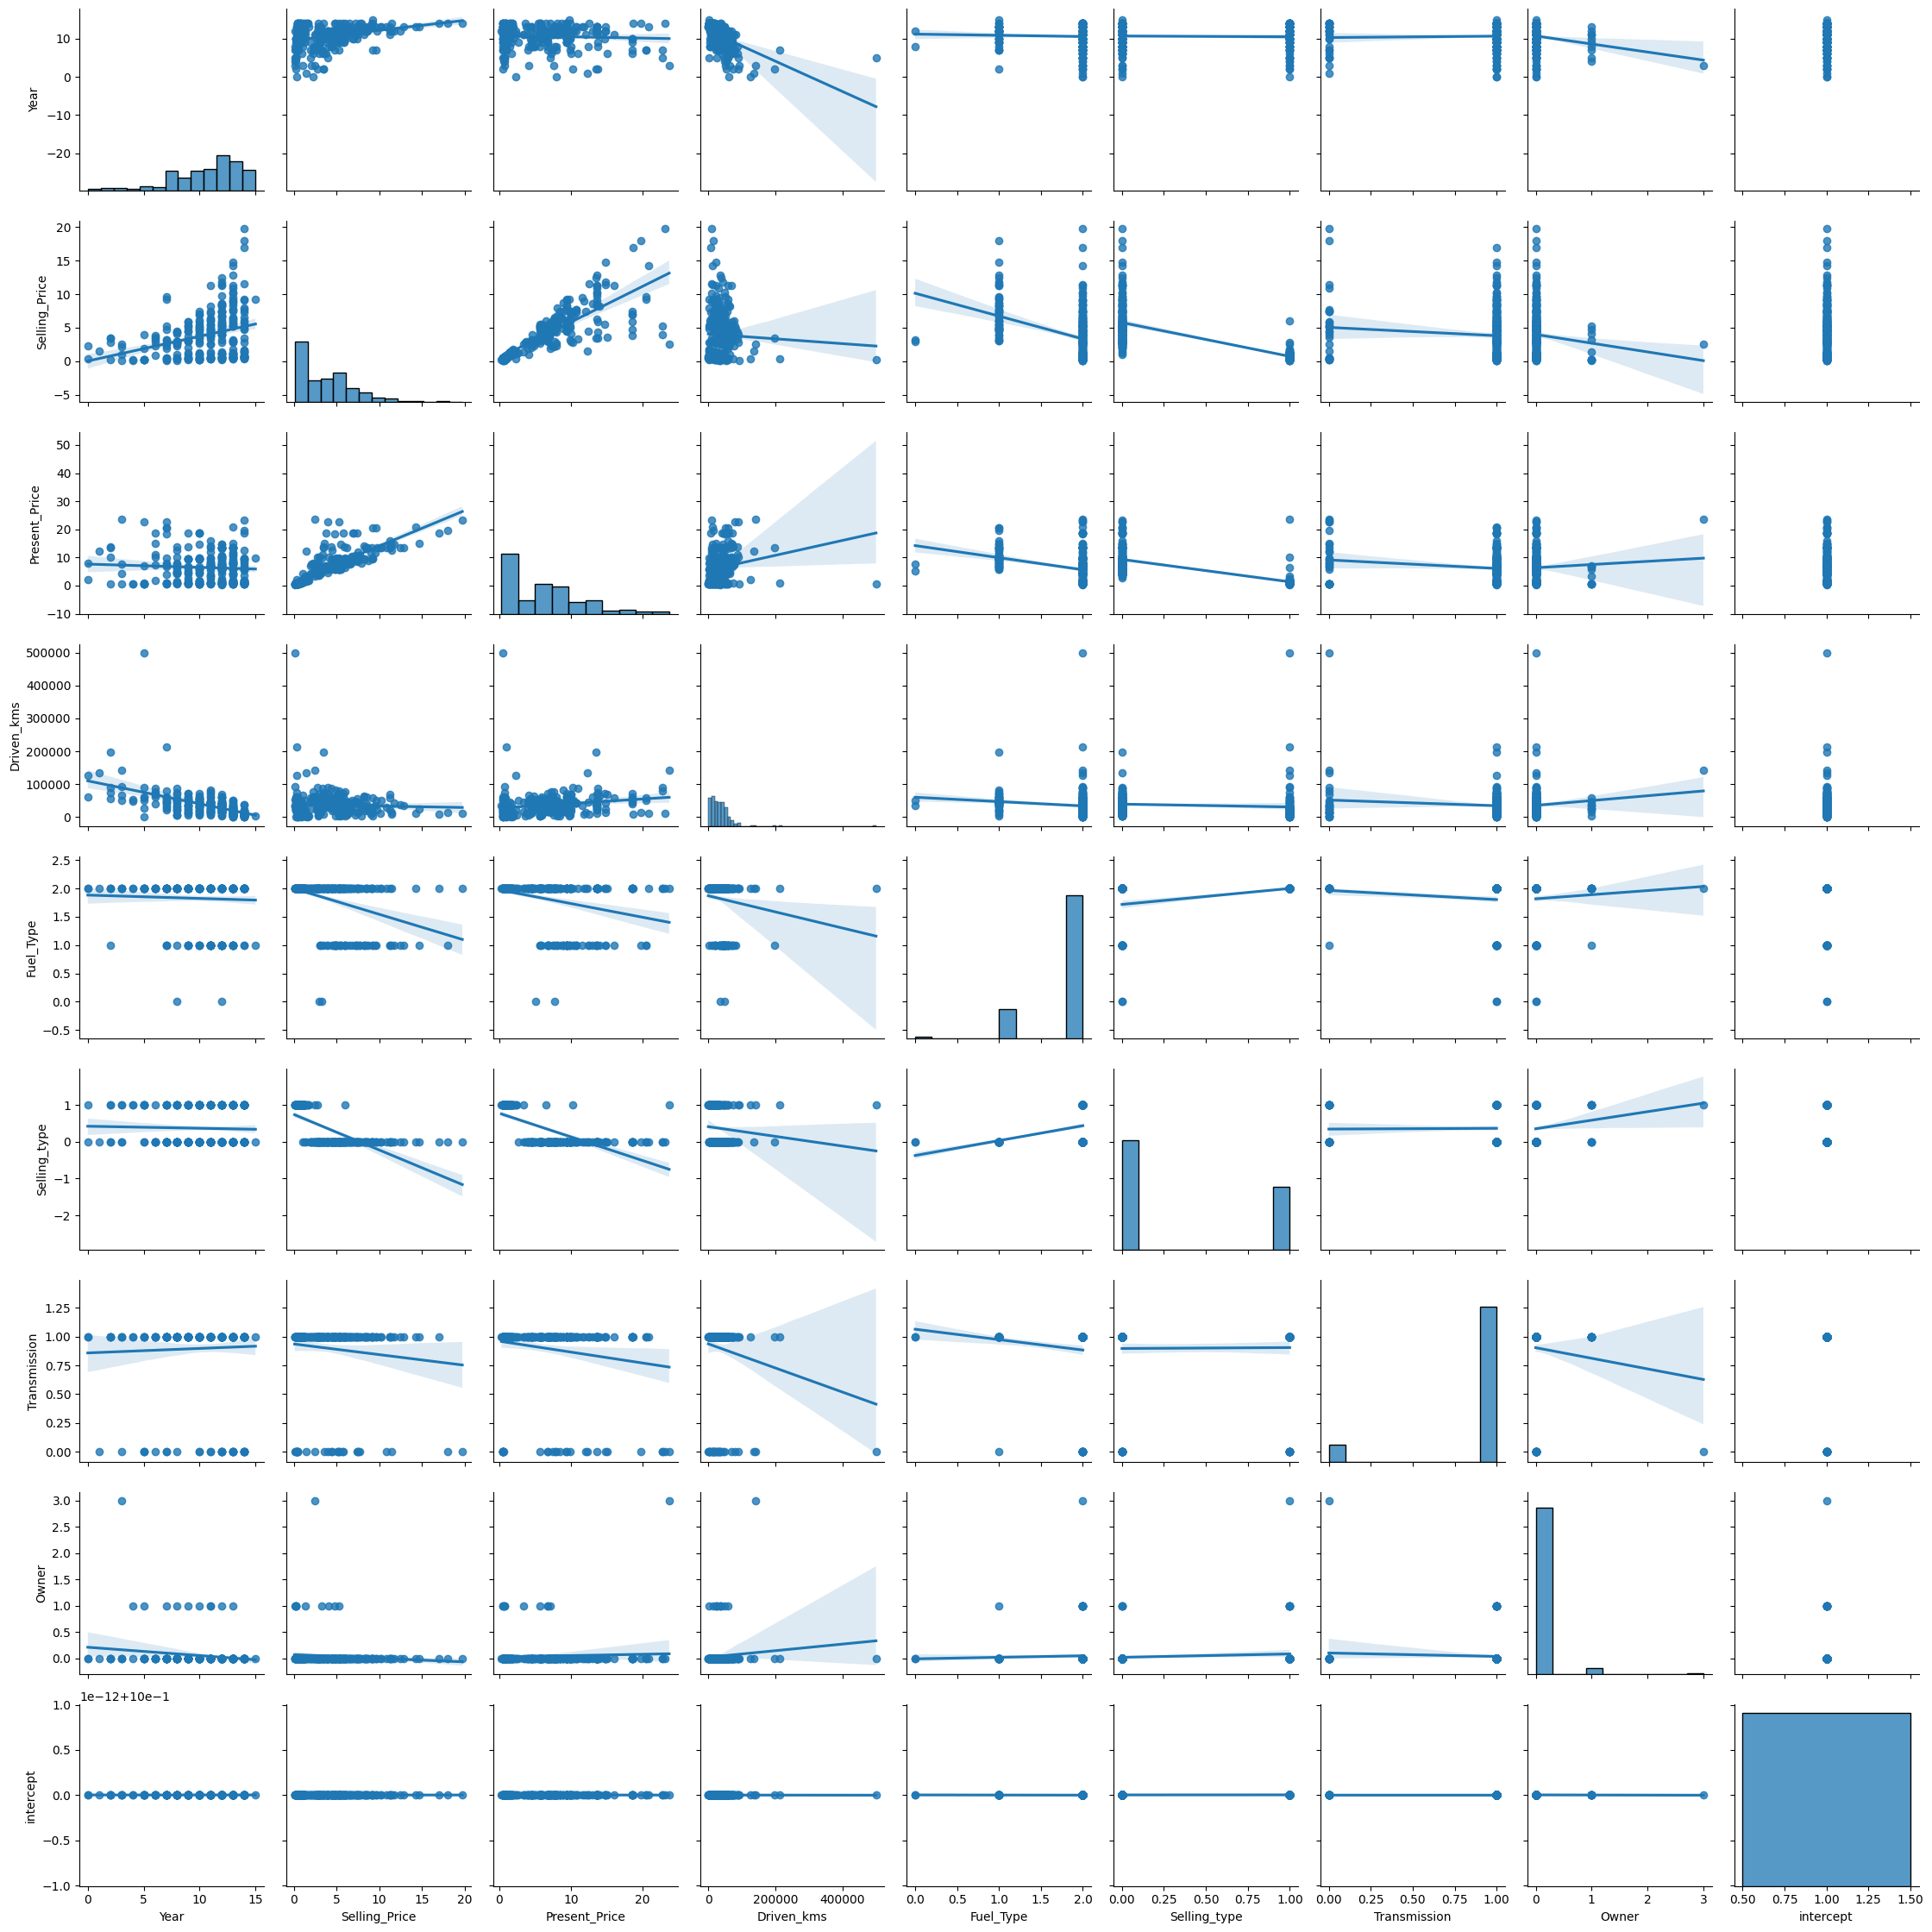

In [ ]:
sns.pairplot(df1,kind = 'reg')
plt.tight_layout()

Text(0.5, 1.0, 'correlation between all Features')

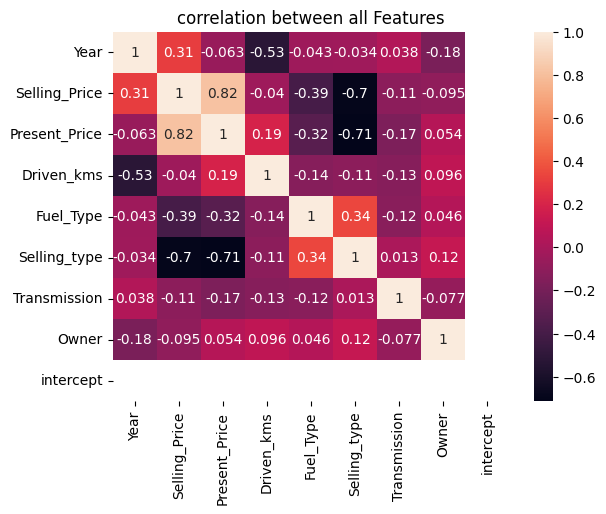

In [ ]:
#heatmap
sns.heatmap(df1.corr(), annot =True)
plt.title('correlation between all Features')

from the Above Corr Matrix we Can Conclude that
1. Present Price
2. Fuel Type
3. Selling Type
4. Year


are the Most Important Features

In [ ]:
#OLS: Oridnary Least Square [taregt , [intercept ,feature]]
lm = sm.OLS(df1['Selling_Price'], df1[['intercept', 'Present_Price',"Fuel_Type",'Selling_type','Year']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     334.4
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          4.21e-106
Time:                        22:33:54   Log-Likelihood:                -518.24
No. Observations:                 289   AIC:                             1046.
Df Residuals:                     284   BIC:                             1065.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -1.3029      0.608     -2.142      0.033      -2.500      -0.105
Present_Price     0.4539      0.023     19.365      0.000       0.408       0.500
Fuel_Type        -0.8898      0.230     -3.865      0.000      -1.343      -0.437
Selling_type     -1.0983      0.261     -4.201      0.000      -1.613      -0.584
Year              0.4096      0.030     13.703      0.000       0.351       0.468
==============================================================================
Omnibus:                       46.049   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.206
Skew:                           0.552   Prob(JB):                     5.53e-44
Kurtosis:                       6.915   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df1 = df1[["Selling_Price","Present_Price",'Fuel_Type','Selling_type','Year']]
df1

Selling_Price  Present_Price  Fuel_Type  Selling_type  Year
0             3.35           5.59          2             0    11
1             4.75           9.54          1             0    10
2             7.25           9.85          2             0    14
3             2.85           4.15          2             0     8
4             4.60           6.87          1             0    11
..             ...            ...        ...           ...   ...
296           9.50          11.60          1             0    13
297           4.00           5.90          2             0    12
298           3.35          11.00          2             0     6
299          11.50          12.50          1             0    14
300           5.30           5.90          2             0    13

[289 rows x 5 columns]

In [ ]:
x = df1.iloc[:,1:].values
y = df1.iloc[:,0].values

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.25 , random_state=14)

In [ ]:
# create an instance
regressor = LinearRegression()

# training model using fit method
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)
print(y_pred)

[ 6.87721985  0.38076141  2.3623484   8.65818464  0.16296182  7.5609587
  5.90587249  0.19018676 -0.11803846 -0.23601324 -0.91598857  4.58404012
  0.59369931  1.64607313 -0.0454386   1.16509904 -1.85913841  4.47546452
  3.08828891  1.450961    8.52712019  2.95994238  0.92914948 -0.48978857
  0.757049    1.9231843   2.70227794  1.4467477  -1.1111007   7.62480777
  1.8813743   8.41335871  0.28865033  5.90587249  3.0510164   0.59856099
  1.75815553  4.40254046  4.03467946  7.62914666  0.64814921  3.19232702
 10.06740052  6.6161879   1.450961    4.49329029  2.6248164   8.24138381
  4.44791538  2.07227314  2.73177224  3.64089029 -0.26323819  7.37926043
  1.99442928  5.81337611  7.1844725   2.01749905  7.9871587   7.62914666
 -0.0454386   1.57314908  1.57314908  0.32268847  8.24138381  1.86776183
  2.96480406  8.84551856  4.80281229  5.05140174  5.94152403  1.89077348
  6.33187388]


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 1.071769335343496
MAE: 0.7853197698965448
RMSE: 1.035262930536729
R-squared: 0.8847743746938602


**LR of R2 = 88.4%**

#SVR for Prediction

In [ ]:
regressor = SVR(kernel="rbf")
regressor.fit(x_train,y_train)

SVR()

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 0.6905669535374263
MAE: 0.4948089084307331
RMSE: 0.831003582144762
R-squared: 0.9257573375043392


**SVM or R2 = 92.5%**

#Decision Tree Regression

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([ 9.65      ,  0.6       ,  1.275     ,  7.25      ,  0.27      ,
        8.7875    ,  4.95      ,  0.3       ,  0.45      ,  0.15      ,
        0.52      ,  5.25      ,  0.4       ,  1.05      ,  0.6       ,
        0.54      ,  0.2       ,  3.925     ,  2.65      ,  1.11      ,
        8.7875    ,  2.55      ,  0.3       ,  0.52      ,  0.54      ,
        2.55      ,  3.75      ,  1.35      ,  0.17      ,  7.15      ,
        0.48      , 10.1025    ,  0.38      ,  4.95      ,  2.825     ,
        1.1       ,  0.95      ,  5.01666667,  3.        ,  7.1       ,
        0.38      ,  3.75      ,  9.65      ,  7.75      ,  1.11      ,
        5.25      ,  2.825     ,  8.35      ,  5.25      ,  1.05      ,
        3.49      ,  4.15      ,  0.15      ,  7.4       ,  2.55      ,
        5.65      ,  5.95      ,  0.65      ,  8.7875    ,  7.1       ,
        0.6       ,  0.6       ,  0.6       ,  2.75      ,  8.35      ,
        0.425     ,  2.        , 11.25      ,  4.5       ,  4.65

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 1.1627656773211568
MAE: 0.6163470319634703
RMSE: 1.0783161305114362
R-squared: 0.8749913830937256


**DT of R2 = 87.49%**

#Lasso

In [ ]:
lass_reg_model = Lasso()
lass_reg_model.fit(x_train,y_train)
test_data_prediction = lass_reg_model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, test_data_prediction)
mae = mean_absolute_error(y_test, test_data_prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_data_prediction)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 1.2451291563503488
MAE: 0.87854410604334
RMSE: 1.1158535550646191
R-squared: 0.8661365082054772


**Laso Of R2 = 86.6%**

#GradientBoosting

In [ ]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_regressor.fit(x_train,y_train)
pred1=gb_regressor.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, pred1)
mae = mean_absolute_error(y_test, pred1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred1)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 0.6066485363248932
MAE: 0.4819444808397394
RMSE: 0.7788764576779127
R-squared: 0.9347793833673295


**Gradient Boosting of R2 = 93.47%**

#Try

In [ ]:
df2 = pd.read_csv("car data.csv")
df2

Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual      0  
2         Dealer       Manual      0  
3         Dealer       Manual      0  
4         Dealer       Manual      0  
..           ...          ...    ...  
296       Dealer       Manual      0  
297       Dealer       Manual      0  
298       Dealer       Manual      0  
299       Dealer       Manual      0  
300       Dealer       Manual      0  

[301 rows x 9 columns]

In [ ]:
px.bar(data_frame = df2.Car_Name.value_counts(),
       title = 'Distribution of Car_Name')

In [ ]:
df2["Car_Name"].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [ ]:
v = df2["Car_Name"].value_counts()
f = v[v>2]

In [ ]:
categories_to_drop = v[v < 3].index
df_filtered = df2[~df2['Car_Name'].isin(categories_to_drop)]

In [ ]:
df_filtered

Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual      0  
2         Dealer       Manual      0  
3         Dealer       Manual      0  
4         Dealer       Manual      0  
..           ...          ...    ...  
296       Dealer       Manual      0  
297       Dealer       Manual      0  
298       Dealer       Manual      0  
299       Dealer       Manual      0  
300       Dealer       Manual      0  

[220 rows x 9 columns]

In [ ]:
px.bar(data_frame = df_filtered.Car_Name.value_counts(),
       title = 'Distribution of Car_Name')

In [ ]:
le = LabelEncoder()
df_filtered['Fuel_Type'] = le.fit_transform(df_filtered['Fuel_Type'])
df_filtered['Selling_type'] = le.fit_transform(df_filtered['Selling_type'])
df_filtered['Transmission'] = le.fit_transform(df_filtered['Transmission'])
df_filtered['Year'] = le.fit_transform(df_filtered['Year'])
df_filtered['Car_Name'] = le.fit_transform(df_filtered['Car_Name'])

<ipython-input-123-6aa2a12438fe>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-123-6aa2a12438fe>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-123-6aa2a12438fe>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-123-6aa

In [ ]:
df_filtered

Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0          28     9           3.35           5.59       27000          2   
1          30     8           4.75           9.54       43000          1   
2          12    12           7.25           9.85        6900          2   
3          32     6           2.85           4.15        5200          2   
4          29     9           4.60           6.87       42450          1   
..        ...   ...            ...            ...         ...        ...   
296        13    11           9.50          11.60       33988          1   
297        11    10           4.00           5.90       60000          2   
298        13     4           3.35          11.00       87934          2   
299        13    12          11.50          12.50        9000          1   
300        11    11           5.30           5.90        5464          2   

     Selling_type  Transmission  Owner  
0               0             1      0  
1               0             1      0  
2               0             1      0  
3               0             1      0  
4               0             1      0  
..            ...           ...    ...  
296             0             1      0  
297             0             1      0  
298             0             1      0  
299             0             1      0  
300             0             1      0  

[220 rows x 9 columns]

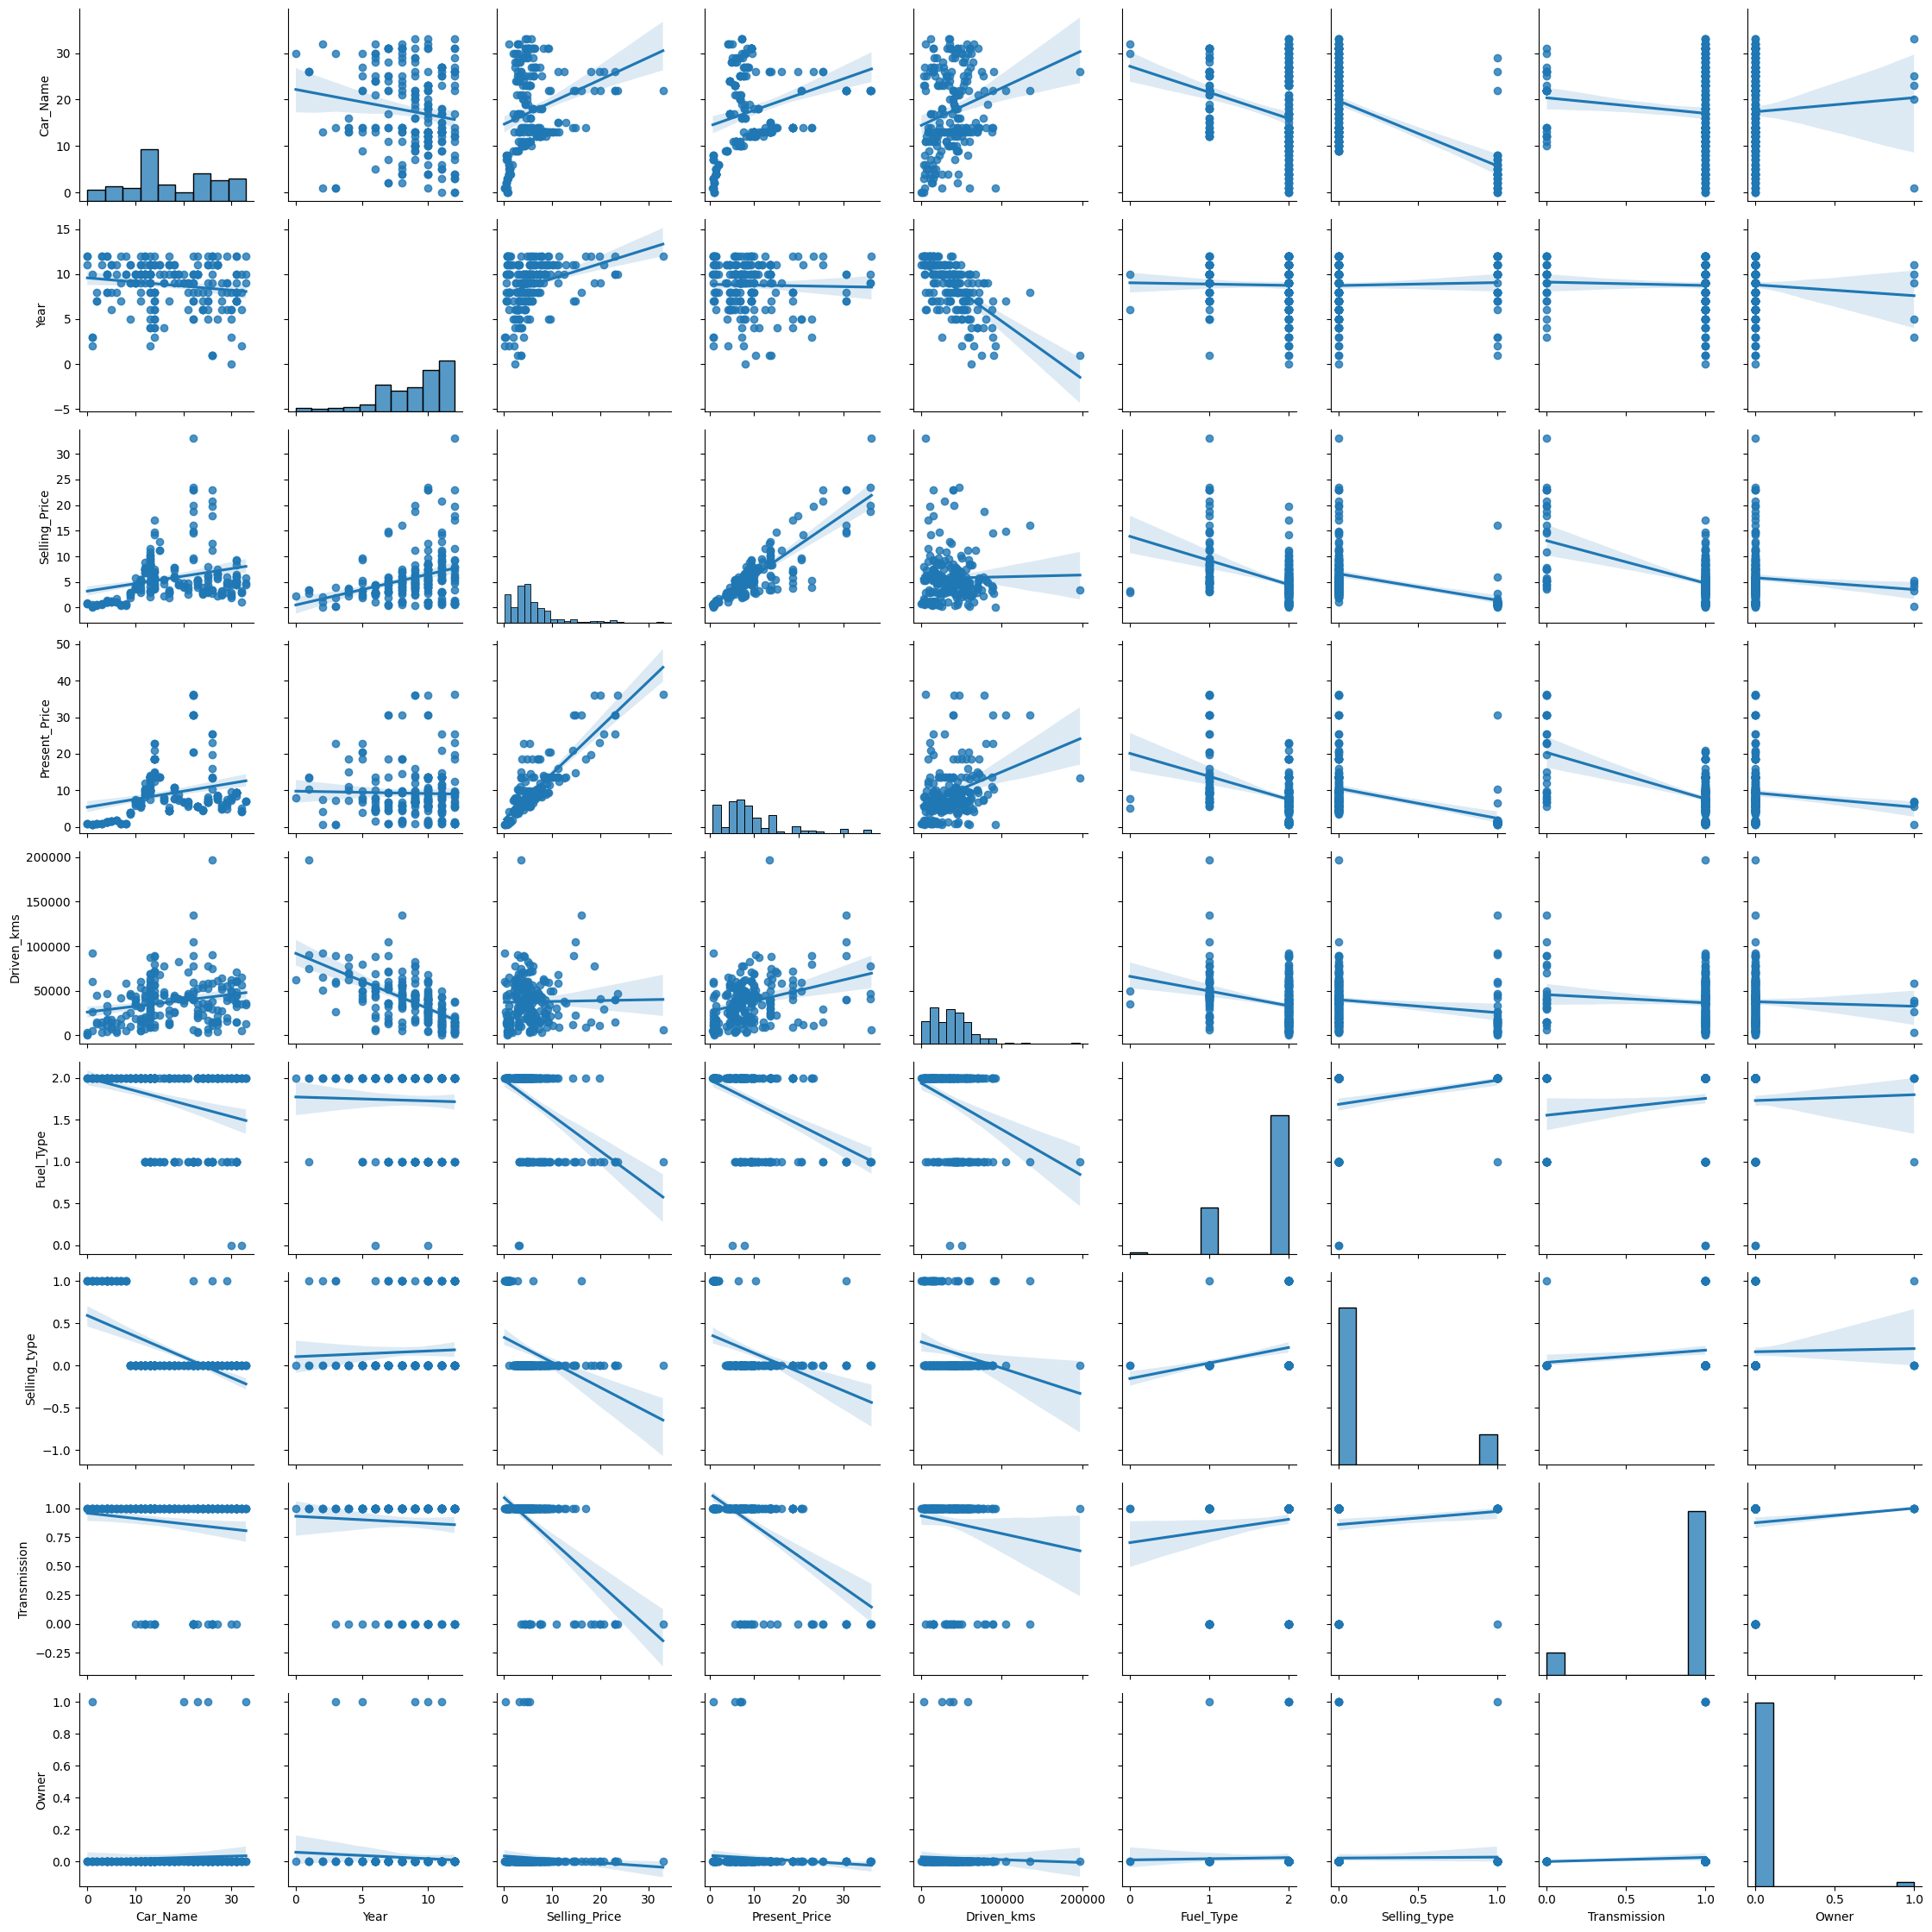

In [ ]:
sns.pairplot(df_filtered,kind = 'reg')
plt.tight_layout()

Text(0.5, 1.0, 'correlation between all Features')

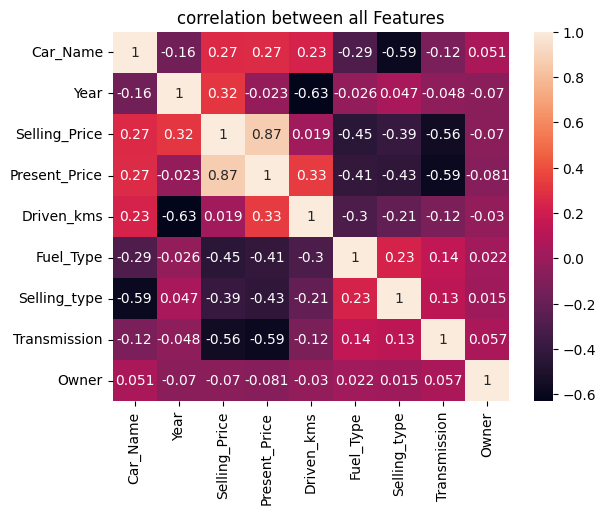

In [ ]:
#heatmap
sns.heatmap(df_filtered.corr(), annot =True)
plt.title('correlation between all Features')

In [ ]:
df_filtered["intercept"] = 1 # col is added for the linear Regression model
lm = sm.OLS(df_filtered['Selling_Price'], df_filtered[['intercept', 'Present_Price',"Fuel_Type",'Selling_type','Year',"Car_Name"]])
result = lm.fit()
result.summary()

<ipython-input-127-f9a0a06aaf31>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     317.3
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           7.43e-97
Time:                        22:46:00   Log-Likelihood:                -426.53
No. Observations:                 220   AIC:                             865.1
Df Residuals:                     214   BIC:                             885.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -4.5822      0.874     -5.243      0.000      -6.305      -2.860
Present_Price     0.5697      0.019     29.693      0.000       0.532       0.608
Fuel_Type        -0.8043      0.280     -2.876      0.004      -1.356      -0.253
Selling_type      0.0945      0.409      0.231      0.818      -0.712       0.901
Year              0.6539      0.045     14.402      0.000       0.564       0.743
Car_Name          0.0417      0.017      2.503      0.013       0.009       0.075
==============================================================================
Omnibus:                       44.487   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.309
Skew:                           0.721   Prob(JB):                     1.16e-39
Kurtosis:                       7.181   Cond. No.                         185.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm = sm.OLS(df_filtered['Selling_Price'], df_filtered[['intercept', 'Present_Price',"Fuel_Type",'Year',"Car_Name"]])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     398.4
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           3.59e-98
Time:                        22:46:06   Log-Likelihood:                -426.56
No. Observations:                 220   AIC:                             863.1
Df Residuals:                     215   BIC:                             880.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -4.5046      0.805     -5.596      0.000      -6.091      -2.918
Present_Price     0.5682      0.018     31.559      0.000       0.533       0.604
Fuel_Type        -0.8082      0.279     -2.901      0.004      -1.357      -0.259
Year              0.6533      0.045     14.444      0.000       0.564       0.742
Car_Name          0.0396      0.014      2.831      0.005       0.012       0.067
==============================================================================
Omnibus:                       45.665   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.432
Skew:                           0.740   Prob(JB):                     3.29e-41
Kurtosis:                       7.260   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
d= df_filtered.drop(['Selling_Price','Selling_type'],axis=1)
z= d.iloc[:,:].values
w = df_filtered.iloc[:,2].values

In [ ]:
z_train , z_test , w_train , w_test = train_test_split(z,w , test_size=0.25 , random_state=1)

In [ ]:
# create an instance
regressor = LinearRegression()

# training model using fit method
regressor.fit(z_train,w_train)

LinearRegression()

In [ ]:
w_pred = regressor.predict(z_test)
print(w_pred)

[ 8.53725545e-01  1.64162755e-02  2.82858763e+00  5.29571648e+00
  1.09757299e+01 -2.21509140e-01  5.49667118e+00  1.96127765e+00
  2.93421180e+00  5.82294946e+00  1.35134801e+01  8.35735219e+00
  8.84872202e+00  5.42187402e+00  9.10971110e+00  6.19515428e+00
  2.09971991e+00  2.19312198e+00  2.27044395e+00  4.49155837e+00
  7.27658155e+00  6.61343912e+00  3.87690375e+00  4.23821218e+00
  6.74328392e+00  3.85732957e+00  1.99147249e+01  8.02124631e+00
  3.98807349e+00  5.29345475e+00  1.58342400e+00  6.46115155e+00
  5.13232317e+00  3.84794617e+00  1.79871224e+01  1.82663233e+00
  4.92561664e-01  7.05883681e+00  4.04673897e+00  5.91600806e-04
  1.89189979e+01  8.21623619e+00  6.28011129e+00  3.07084703e+00
  3.39226918e+00  6.66514332e+00  8.01095156e+00  4.48017605e+00
  6.82402174e-01  1.48029884e+00  1.34182943e+00  1.28944866e+00
 -1.18638399e+00  7.53996020e+00  5.26116032e+00]


In [ ]:
mse = mean_squared_error(w_test, w_pred)
mae = mean_absolute_error(w_test, w_pred)
rmse = np.sqrt(mse)
r2 = r2_score(w_test, w_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 1.780215238799352
MAE: 1.0347892871202615
RMSE: 1.3342470681246978
R-squared: 0.9249399640768421


**LR with R2 = 92.4%**

#SVR

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(z_train,w_train)

SVR()

In [ ]:
w_pred = regressor.predict(z_test)
print(w_pred)

[5.14156407 4.41013169 5.02757253 5.03730473 4.64932357 4.73248133
 4.76815454 4.37502365 4.99312327 4.82817872 5.11934221 5.15265725
 5.08294994 4.31984317 5.00727656 4.64992356 5.13542679 4.3274871
 4.94638939 5.138446   5.01072567 4.67326954 5.02450274 4.88353233
 4.76815694 4.64987713 4.88412669 5.14157107 4.88411452 4.36955572
 4.76150124 4.96891088 4.76630471 5.0993176  5.08590283 4.72758283
 4.32076848 4.76815557 5.1096556  5.13865647 5.14158143 5.00705872
 4.90620078 4.85146373 4.98839366 4.31617678 4.8768573  4.89555125
 4.49152938 4.56684302 4.55549175 5.14198508 4.36930984 4.88129929
 5.03512568]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(w_test, w_pred)
mae = mean_absolute_error(w_test, w_pred)
rmse = np.sqrt(mse)
r2 = r2_score(w_test, w_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 23.505860773903496
MAE: 3.002862003727953
RMSE: 4.848284312404079
R-squared: 0.008911554265824573


#Decision Tree

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(z_train,w_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
w_pred = regressor.predict(z_test)
print(w_pred)

[ 1.05  3.35  0.65  5.25  7.05  1.1   3.9   4.    1.35  3.95 17.    7.25
 10.11  4.95  8.99  3.25  1.05  3.35  0.9   5.5   6.4   4.75  4.4   3.9
  4.75  3.25 23.    8.99  3.95  6.85  2.85  9.1   9.1   2.85 19.75  2.85
  2.25  7.2   4.4   0.5  19.75  8.4   6.    3.25  3.1   5.9   8.4   3.95
  3.35  2.    2.9   0.6   2.55  8.4   5.25]


In [ ]:
mse = mean_squared_error(w_test, w_pred)
mae = mean_absolute_error(w_test, w_pred)
rmse = np.sqrt(mse)
r2 = r2_score(w_test, w_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 1.3717818181818178
MAE: 0.8279999999999998
RMSE: 1.1712308987479019
R-squared: 0.9421609307080719


**Decision Tree With R2 = 94.2%**

#Lasso

In [ ]:
lass_reg_model = Lasso()
lass_reg_model.fit(z_train,w_train)
test_data_prediction = lass_reg_model.predict(z_test)

In [ ]:
mse = mean_squared_error(w_test, w_pred)
mae = mean_absolute_error(w_test, w_pred)
rmse = np.sqrt(mse)
r2 = r2_score(w_test, w_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 1.3717818181818178
MAE: 0.8279999999999998
RMSE: 1.1712308987479019
R-squared: 0.9421609307080719


**Lasso With R2 = 94.2%**

#Gradient Boosting

In [ ]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_regressor.fit(z_train,w_train)
pred1=gb_regressor.predict(z_test)

In [ ]:
mse = mean_squared_error(w_test, w_pred)
mae = mean_absolute_error(w_test, w_pred)
rmse = np.sqrt(mse)
r2 = r2_score(w_test, w_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 1.3717818181818178
MAE: 0.8279999999999998
RMSE: 1.1712308987479019
R-squared: 0.9421609307080719


**Gradient of R2 = 94.2%**

#Eploring More about Data

In [ ]:
df3 = pd.read_csv("car data.csv")
df3

Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual      0  
2         Dealer       Manual      0  
3         Dealer       Manual      0  
4         Dealer       Manual      0  
..           ...          ...    ...  
296       Dealer       Manual      0  
297       Dealer       Manual      0  
298       Dealer       Manual      0  
299       Dealer       Manual      0  
300       Dealer       Manual      0  

[301 rows x 9 columns]

After exploring data we Found that there are 100 rows that consists of Motorcycle data from 100:200

In [ ]:
df_m = df3.iloc[100:201,:]
df_m

Car_Name  Year  Selling_Price  Present_Price  \
100  Royal Enfield Thunder 500  2016           1.75           1.90   
101         UM Renegade Mojave  2017           1.70           1.82   
102                  KTM RC200  2017           1.65           1.78   
103          Bajaj Dominar 400  2017           1.45           1.60   
104  Royal Enfield Classic 350  2017           1.35           1.47   
..                         ...   ...            ...            ...   
196                  Activa 3g  2008           0.17           0.52   
197           Honda CB twister  2010           0.16           0.51   
198         Bajaj Discover 125  2011           0.15           0.57   
199             Honda CB Shine  2007           0.12           0.58   
200           Bajaj Pulsar 150  2006           0.10           0.75   

     Driven_kms Fuel_Type Selling_type Transmission  Owner  
100        3000    Petrol   Individual       Manual      0  
101        1400    Petrol   Individual       Manual      0  
102        4000    Petrol   Individual       Manual      0  
103        1200    Petrol   Individual       Manual      0  
104        4100    Petrol   Individual       Manual      0  
..          ...       ...          ...          ...    ...  
196      500000    Petrol   Individual    Automatic      0  
197       33000    Petrol   Individual       Manual      0  
198       35000    Petrol   Individual       Manual      1  
199       53000    Petrol   Individual       Manual      0  
200       92233    Petrol   Individual       Manual      0  

[101 rows x 9 columns]

In [ ]:
df_c = pd.concat([df3.iloc[:100], df3.iloc[201:]])
df_c

Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual      0  
2         Dealer       Manual      0  
3         Dealer       Manual      0  
4         Dealer       Manual      0  
..           ...          ...    ...  
296       Dealer       Manual      0  
297       Dealer       Manual      0  
298       Dealer       Manual      0  
299       Dealer       Manual      0  
300       Dealer       Manual      0  

[200 rows x 9 columns]

**Distribution of Motorcycle Dataframe Numeric Cols**

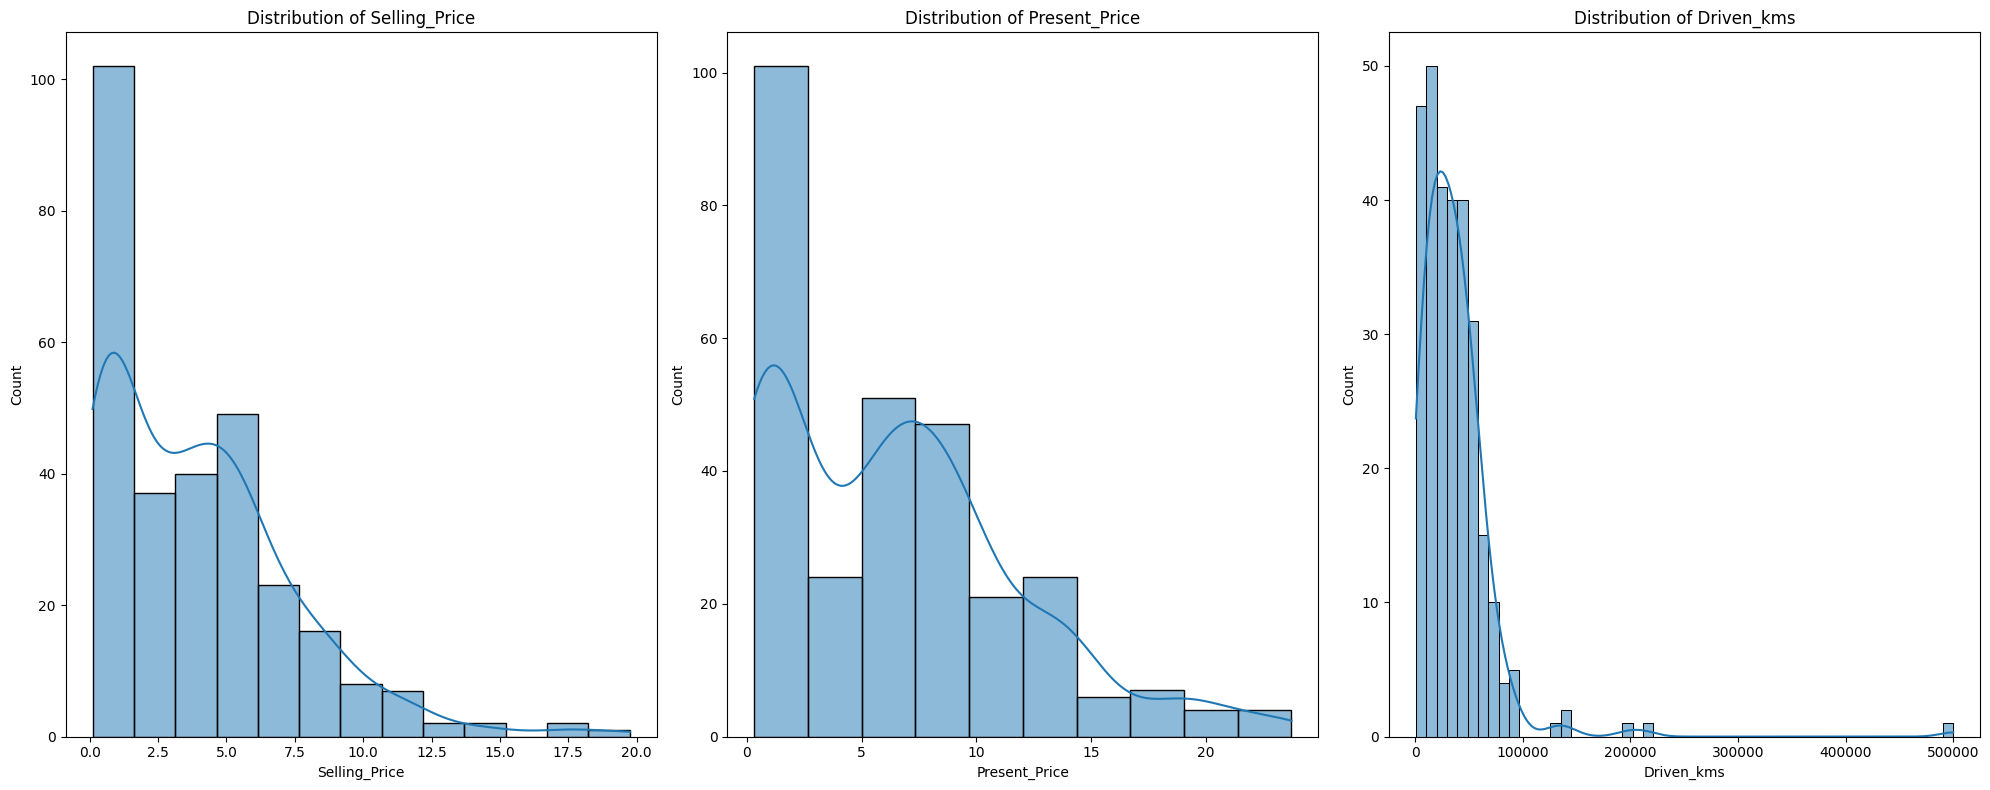

In [ ]:
plt.figure(figsize=(20,8))
for e,i in enumerate(df_m.columns[2:5]): #2,3,4 cols
  plt.subplot(1,3,e+1)
  plt.title("Distribution of "+i)
  sns.histplot(df[i],kde=True)
  plt.tight_layout()

**Distribution of cars Dataframe Numeric Cols**

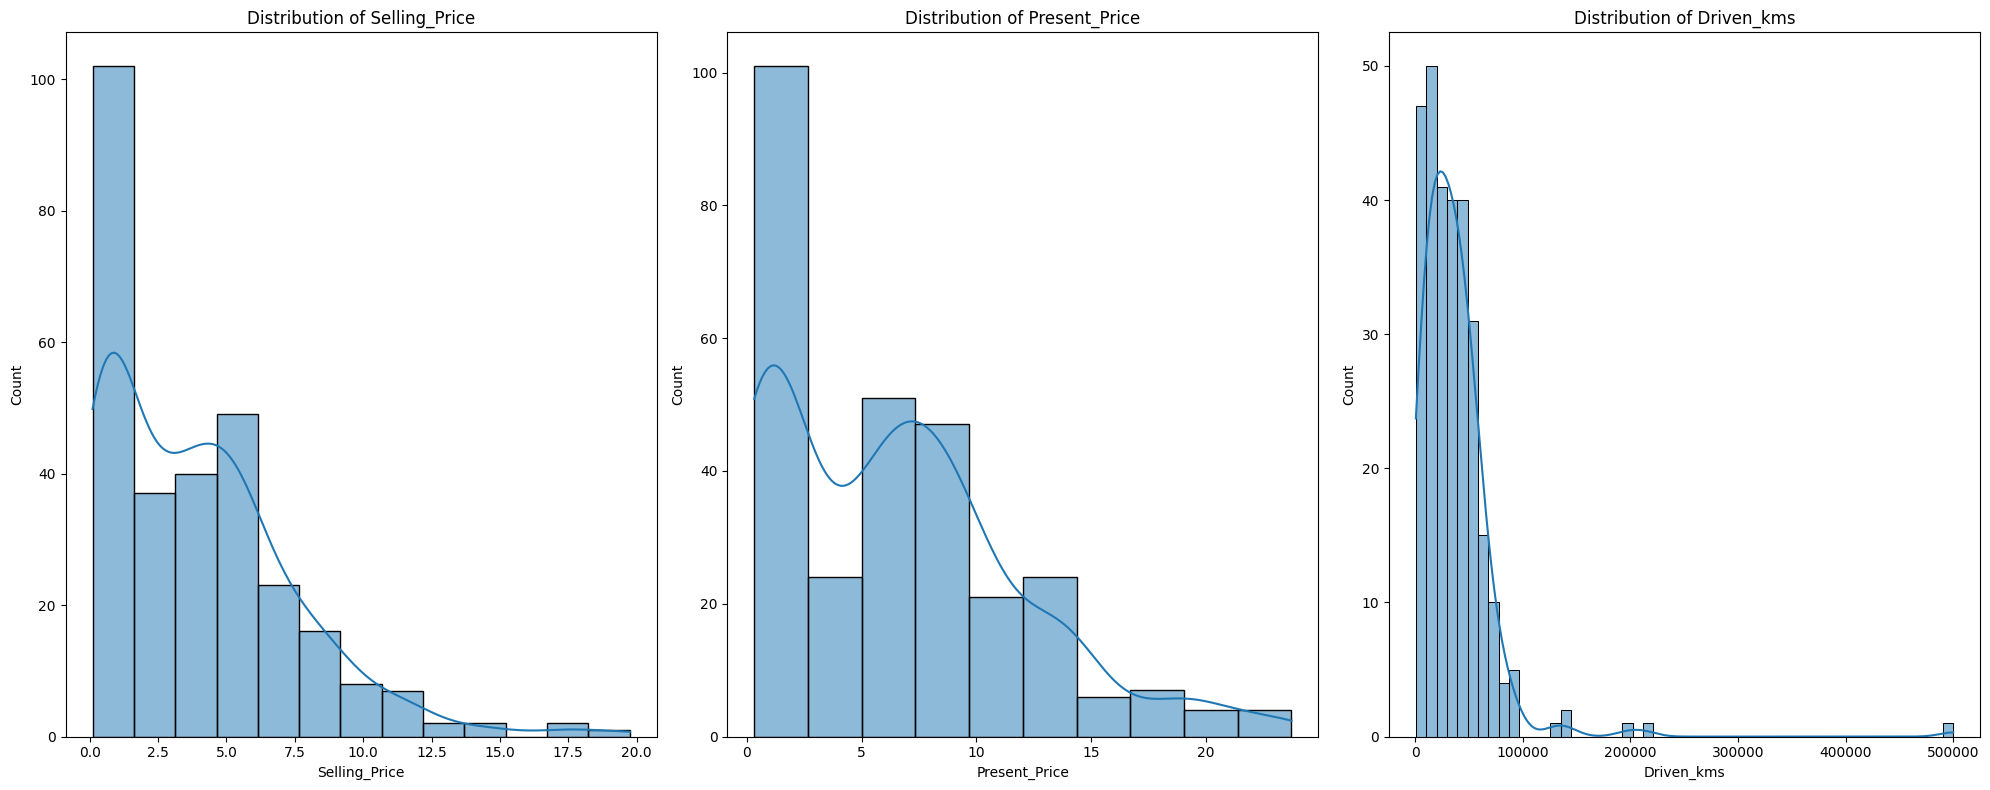

In [ ]:
plt.figure(figsize=(20,8))
for e,i in enumerate(df_c.columns[2:5]): #2,3,4 cols
  plt.subplot(1,3,e+1)
  plt.title("Distribution of "+i)
  sns.histplot(df[i],kde=True)
  plt.tight_layout()

**Distribution of Motorcycle Names **

In [ ]:
px.bar(data_frame = df_m.Car_Name.value_counts(),
       title = 'Distribution of Motorcycle_Names')

**Distribution of car Names **

In [ ]:
px.bar(data_frame = df_c.Car_Name.value_counts(),
       title = 'Distribution of Car_Name')

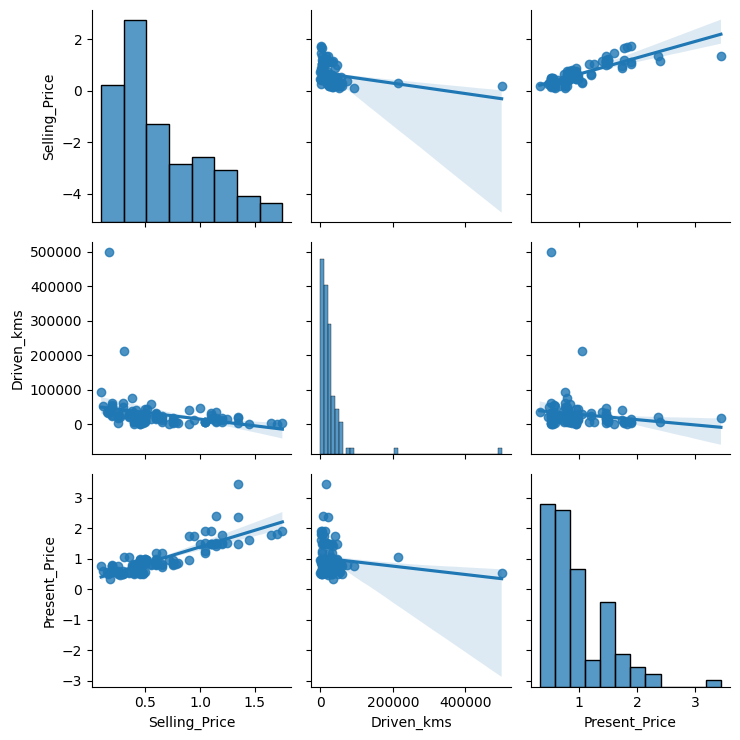

In [ ]:
corr_m = df_m[["Selling_Price", "Driven_kms","Present_Price"]]
sns.pairplot(corr_m,kind = 'reg')
plt.tight_layout()

Text(0.5, 1.0, 'correlation between numerical values')

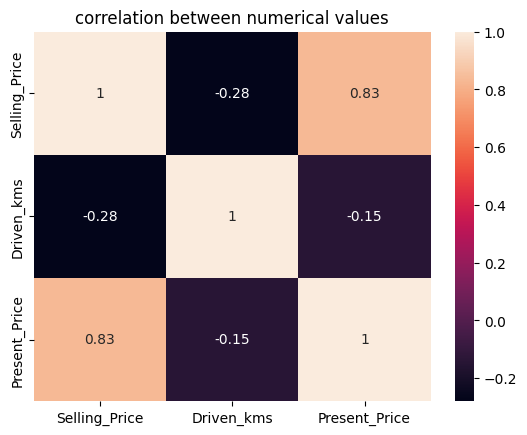

In [ ]:
#heatmap
sns.heatmap(corr_m.corr(), annot =True)
plt.title('correlation between numerical values')

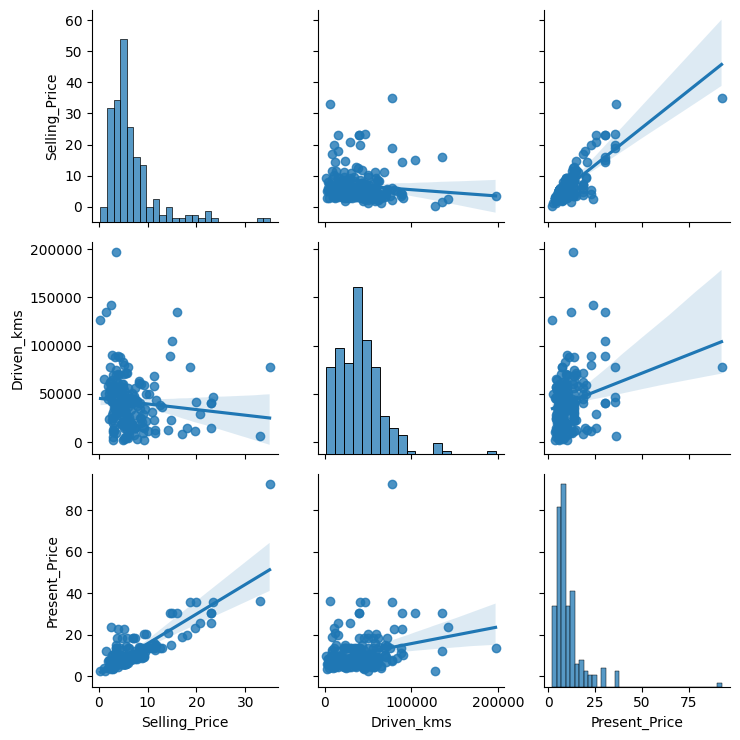

In [ ]:
corr_c = df_c[["Selling_Price", "Driven_kms","Present_Price"]]
sns.pairplot(corr_c,kind = 'reg')
plt.tight_layout()

Text(0.5, 1.0, 'correlation between numerical values')

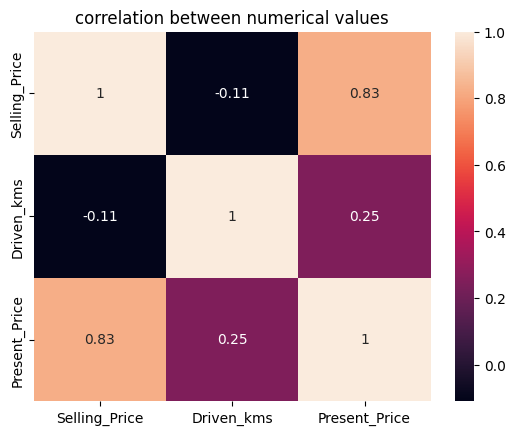

In [ ]:
#heatmap
sns.heatmap(corr_c.corr(), annot =True)
plt.title('correlation between numerical values')

In [ ]:
df_m["intercept"] = 1 # col is added for the linear Regression model
lm = sm.OLS(df_m['Selling_Price'], df_m[['intercept', 'Present_Price','Driven_kms']])
result_m = lm.fit()
result_m.summary()

<ipython-input-161-2111c12b1d1a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     125.4
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           9.62e-28
Time:                        22:54:21   Log-Likelihood:                 16.477
No. Observations:                 101   AIC:                            -26.95
Df Residuals:                      98   BIC:                            -19.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.0642      0.048      1.327      0.188      -0.032       0.160
Present_Price     0.6155      0.041     14.948      0.000       0.534       0.697
Driven_kms    -1.173e-06    3.9e-07     -3.007      0.003   -1.95e-06   -3.99e-07
==============================================================================
Omnibus:                        7.210   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.027   Jarque-Bera (JB):               12.768
Skew:                          -0.126   Prob(JB):                      0.00169
Kurtosis:                       4.723   Cond. No.                     1.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df_c["intercept"] = 1 # col is added for the linear Regression model
lm = sm.OLS(df_c['Selling_Price'], df_c[['intercept', 'Present_Price','Driven_kms']])
result_c = lm.fit()
result_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     362.8
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           8.97e-67
Time:                        22:54:32   Log-Likelihood:                -456.70
No. Observations:                 200   AIC:                             919.4
Df Residuals:                     197   BIC:                             929.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         3.5096      0.342     10.263      0.000       2.835       4.184
Present_Price     0.5270      0.020     26.730      0.000       0.488       0.566
Driven_kms    -6.292e-05   6.38e-06     -9.855      0.000   -7.55e-05   -5.03e-05
==============================================================================
Omnibus:                       32.985   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.621
Skew:                           0.143   Prob(JB):                     1.14e-56
Kurtosis:                       8.553   Cond. No.                     1.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
z= df_m.iloc[:,3:5].values
w= df_m.iloc[:,2].values

In [ ]:
z_train , z_test , w_train , w_test = train_test_split(z,w , test_size=0.1 , random_state=9)

In [ ]:
# create an instance
regressor = LinearRegression()

# training model using fit method
regressor.fit(z_train,w_train)

LinearRegression()

In [ ]:
w_pred = regressor.predict(z_test)
print(w_pred)

[0.45935107 0.54381293 0.52796111 0.49712619 1.03247457 0.6241186
 0.90252477 0.82293857 0.56467373 0.37710914 0.53005853]


In [ ]:
mse = mean_squared_error(w_test, w_pred)
mae = mean_absolute_error(w_test, w_pred)
rmse = np.sqrt(mse)
r2 = r2_score(w_test, w_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 0.025853498111158203
MAE: 0.11439908636794179
RMSE: 0.1607902301483464
R-squared: 0.7595263766488729


#Encoding

In [ ]:
le = LabelEncoder()
df_m['Fuel_Type'] = le.fit_transform(df_m['Fuel_Type'])
df_m['Selling_type'] = le.fit_transform(df_m['Selling_type'])
df_m['Transmission'] = le.fit_transform(df_m['Transmission'])
df_m['Year'] = le.fit_transform(df_m['Year'])
df_m['Car_Name'] = le.fit_transform(df_m['Car_Name'])

<ipython-input-173-ed415d075880>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-173-ed415d075880>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-173-ed415d075880>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-173-ed4

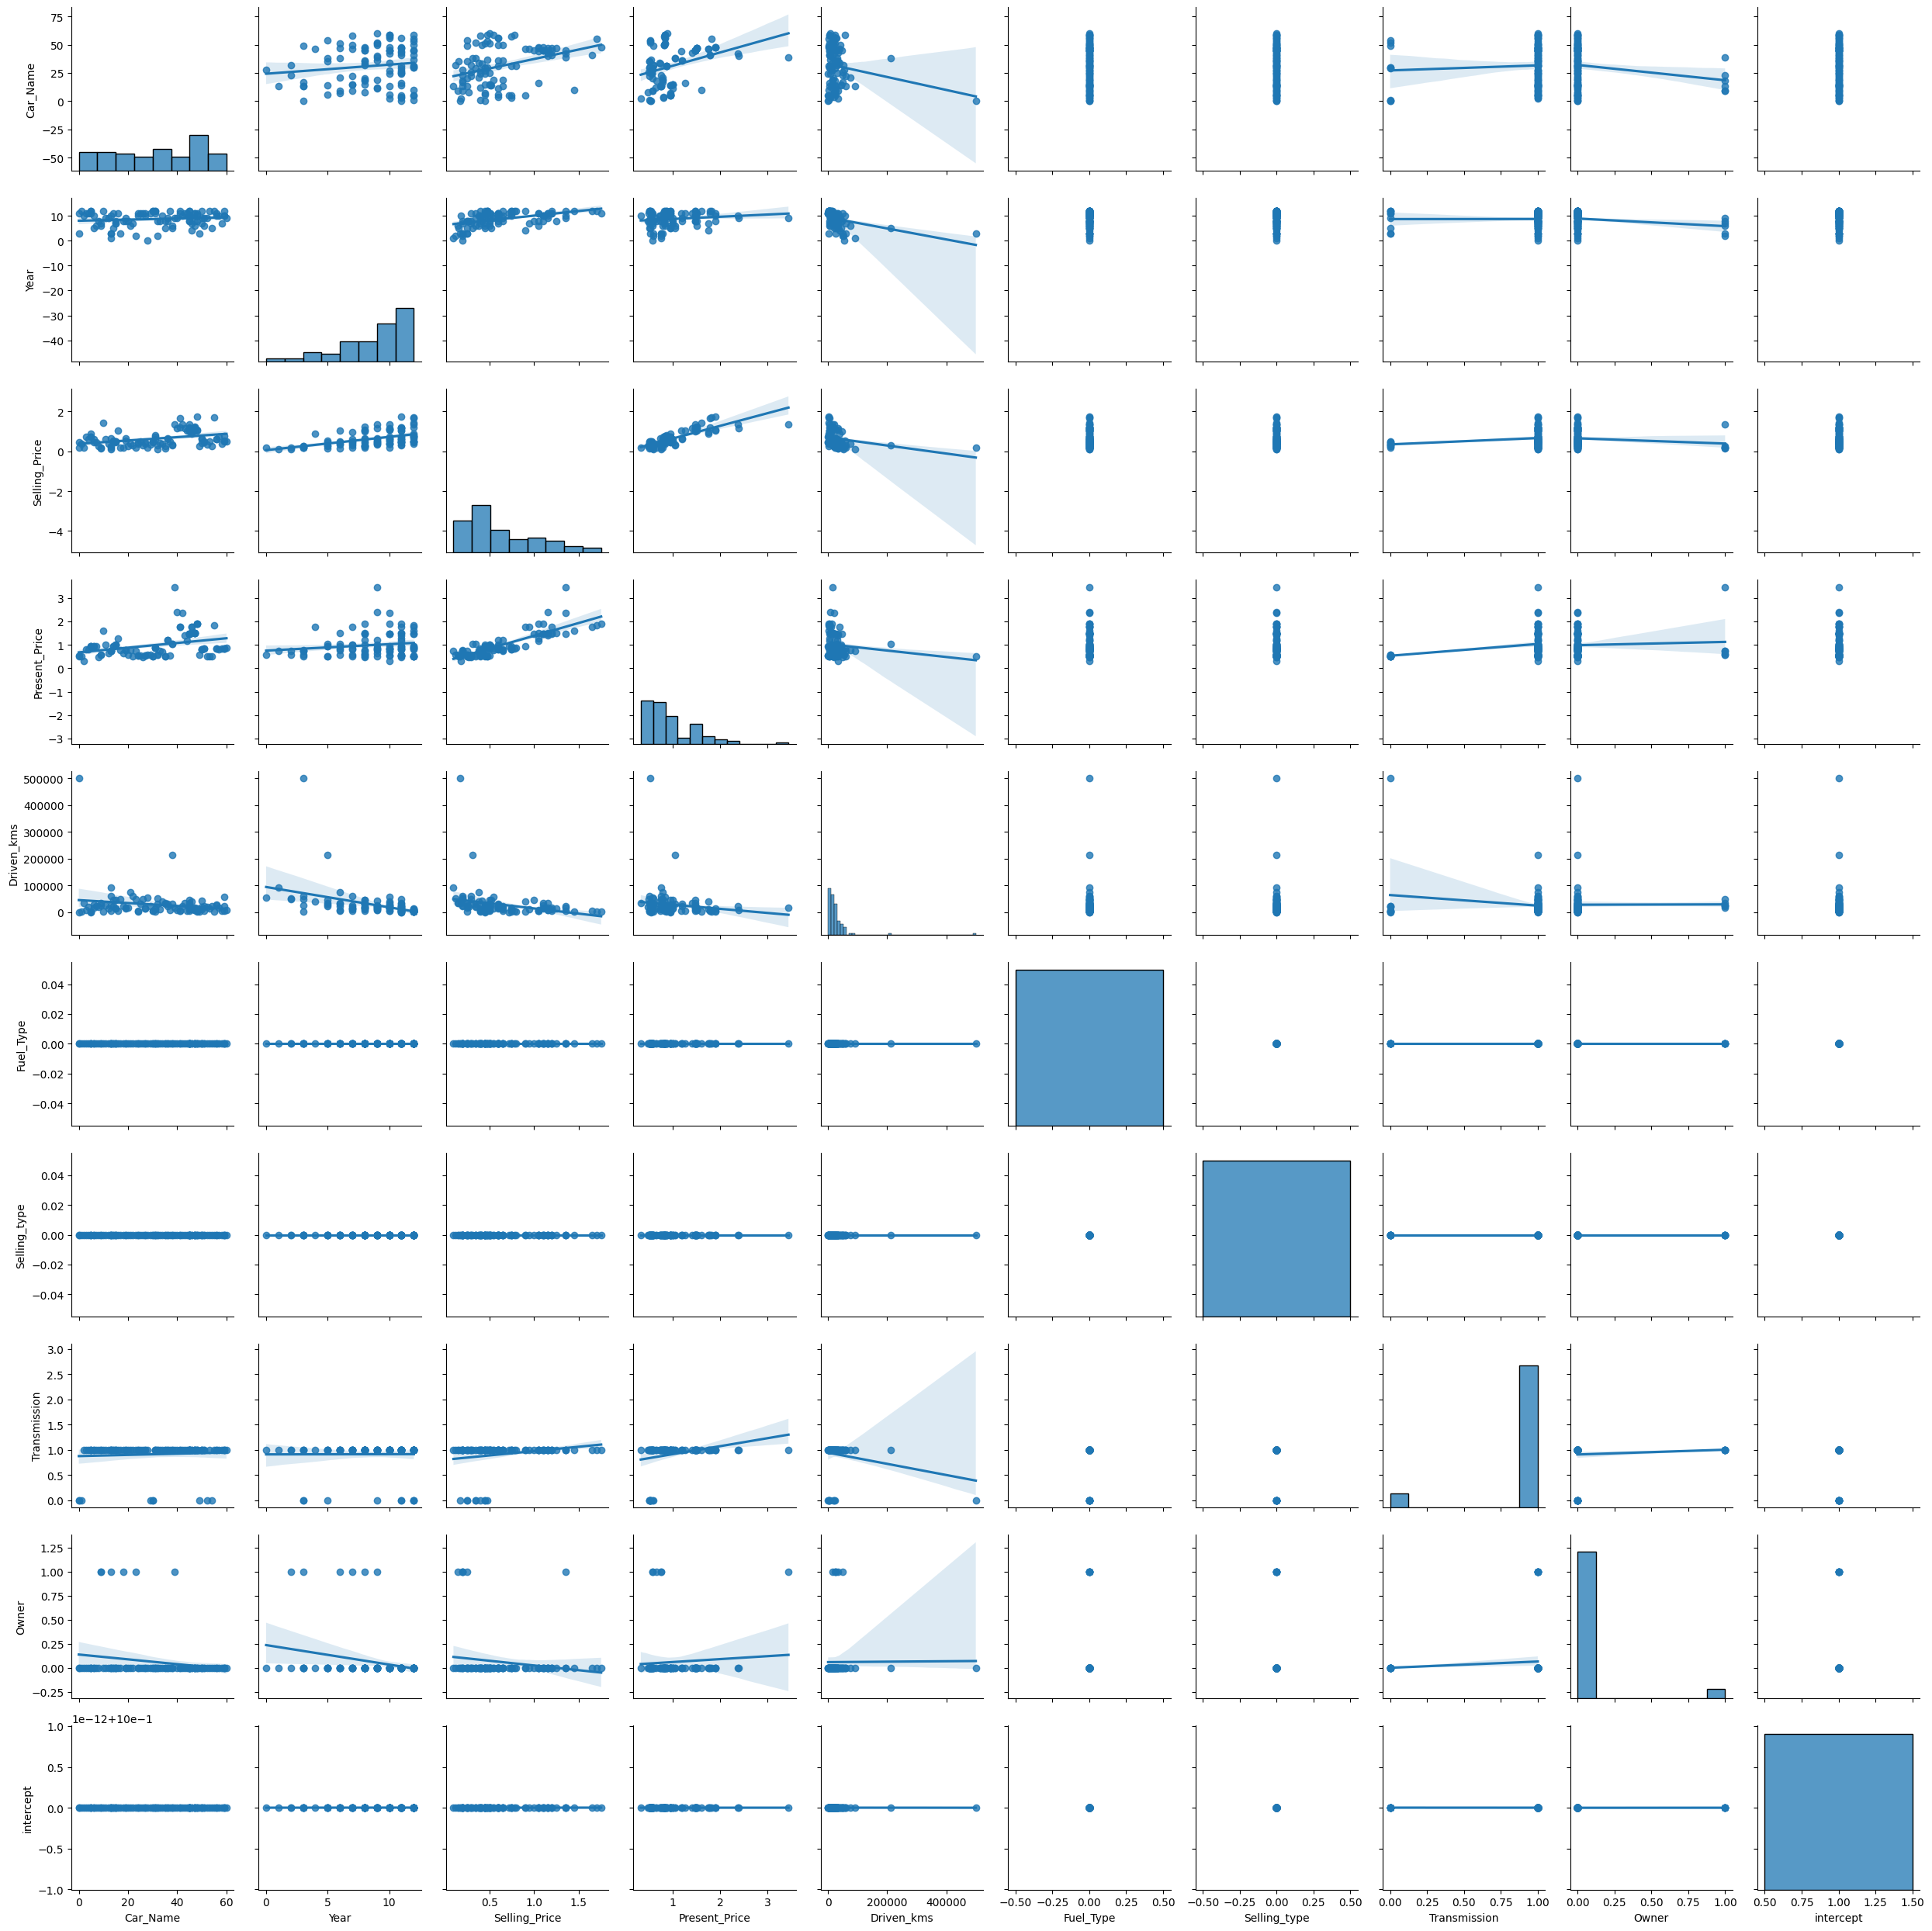

In [ ]:
corr_m = df_m
sns.pairplot(corr_m,kind = 'reg')
plt.tight_layout()

Text(0.5, 1.0, 'correlation between numerical values')

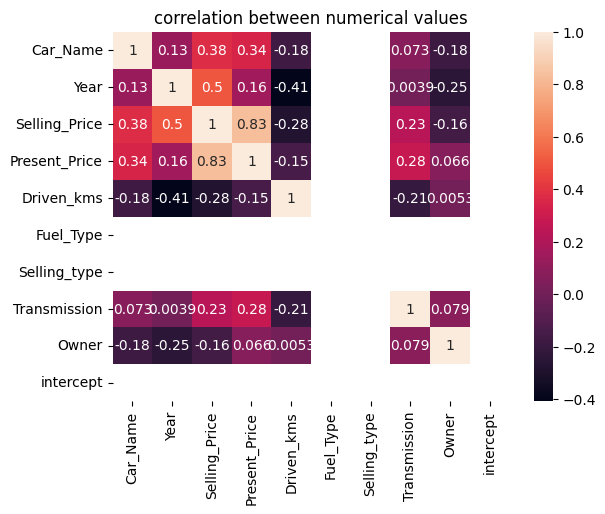

In [ ]:
#heatmap
sns.heatmap(corr_m.corr(), annot =True)
plt.title('correlation between numerical values')

In [ ]:
lm = sm.OLS(df_m['Selling_Price'], df_m[['intercept', 'Present_Price',"Year"]])
result_m = lm.fit()
result_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     244.1
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           8.68e-39
Time:                        22:58:06   Log-Likelihood:                 42.687
No. Observations:                 101   AIC:                            -79.37
Df Residuals:                      98   BIC:                            -71.53
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -0.3824      0.056     -6.825      0.000      -0.494      -0.271
Present_Price     0.5885      0.032     18.494      0.000       0.525       0.652
Year              0.0506      0.006      9.048      0.000       0.040       0.062
==============================================================================
Omnibus:                       20.232   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.180
Skew:                          -0.398   Prob(JB):                     7.11e-20
Kurtosis:                       7.508   Cond. No.                         33.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Motorcycle Data**

In [ ]:
dm = df_m[["Present_Price","Year"]]
z= dm.iloc[:,:].values
w= df_m.iloc[:,2].values

In [ ]:
z_train , z_test , w_train , w_test = train_test_split(z,w , test_size=0.1 , random_state=48)

In [ ]:
# create an instance
regressor = LinearRegression()

# training model using fit method
regressor.fit(z_train,w_train)

LinearRegression()

In [ ]:
w_pred = regressor.predict(z_test)
print(w_pred)

[0.49115925 1.51868788 0.44994405 1.08883061 1.0564462  0.21441876
 0.16436913 1.0564462  0.44699803 0.23620586 0.68253426]


In [ ]:
mse = mean_squared_error(w_test, w_pred)
mae = mean_absolute_error(w_test, w_pred)
rmse = np.sqrt(mse)
r2 = r2_score(w_test, w_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 0.007833797533087522
MAE: 0.07489599370692122
RMSE: 0.0885087426929539
R-squared: 0.9592830970144506


**LR on Motorcycle data with R2 = 95.9%**

**For Car Data**

In [ ]:
le = LabelEncoder()
df_c['Fuel_Type'] = le.fit_transform(df_c['Fuel_Type'])
df_c['Selling_type'] = le.fit_transform(df_c['Selling_type'])
df_c['Transmission'] = le.fit_transform(df_c['Transmission'])
df_c['Year'] = le.fit_transform(df_c['Year'])
df_c['Car_Name'] = le.fit_transform(df_c['Car_Name'])

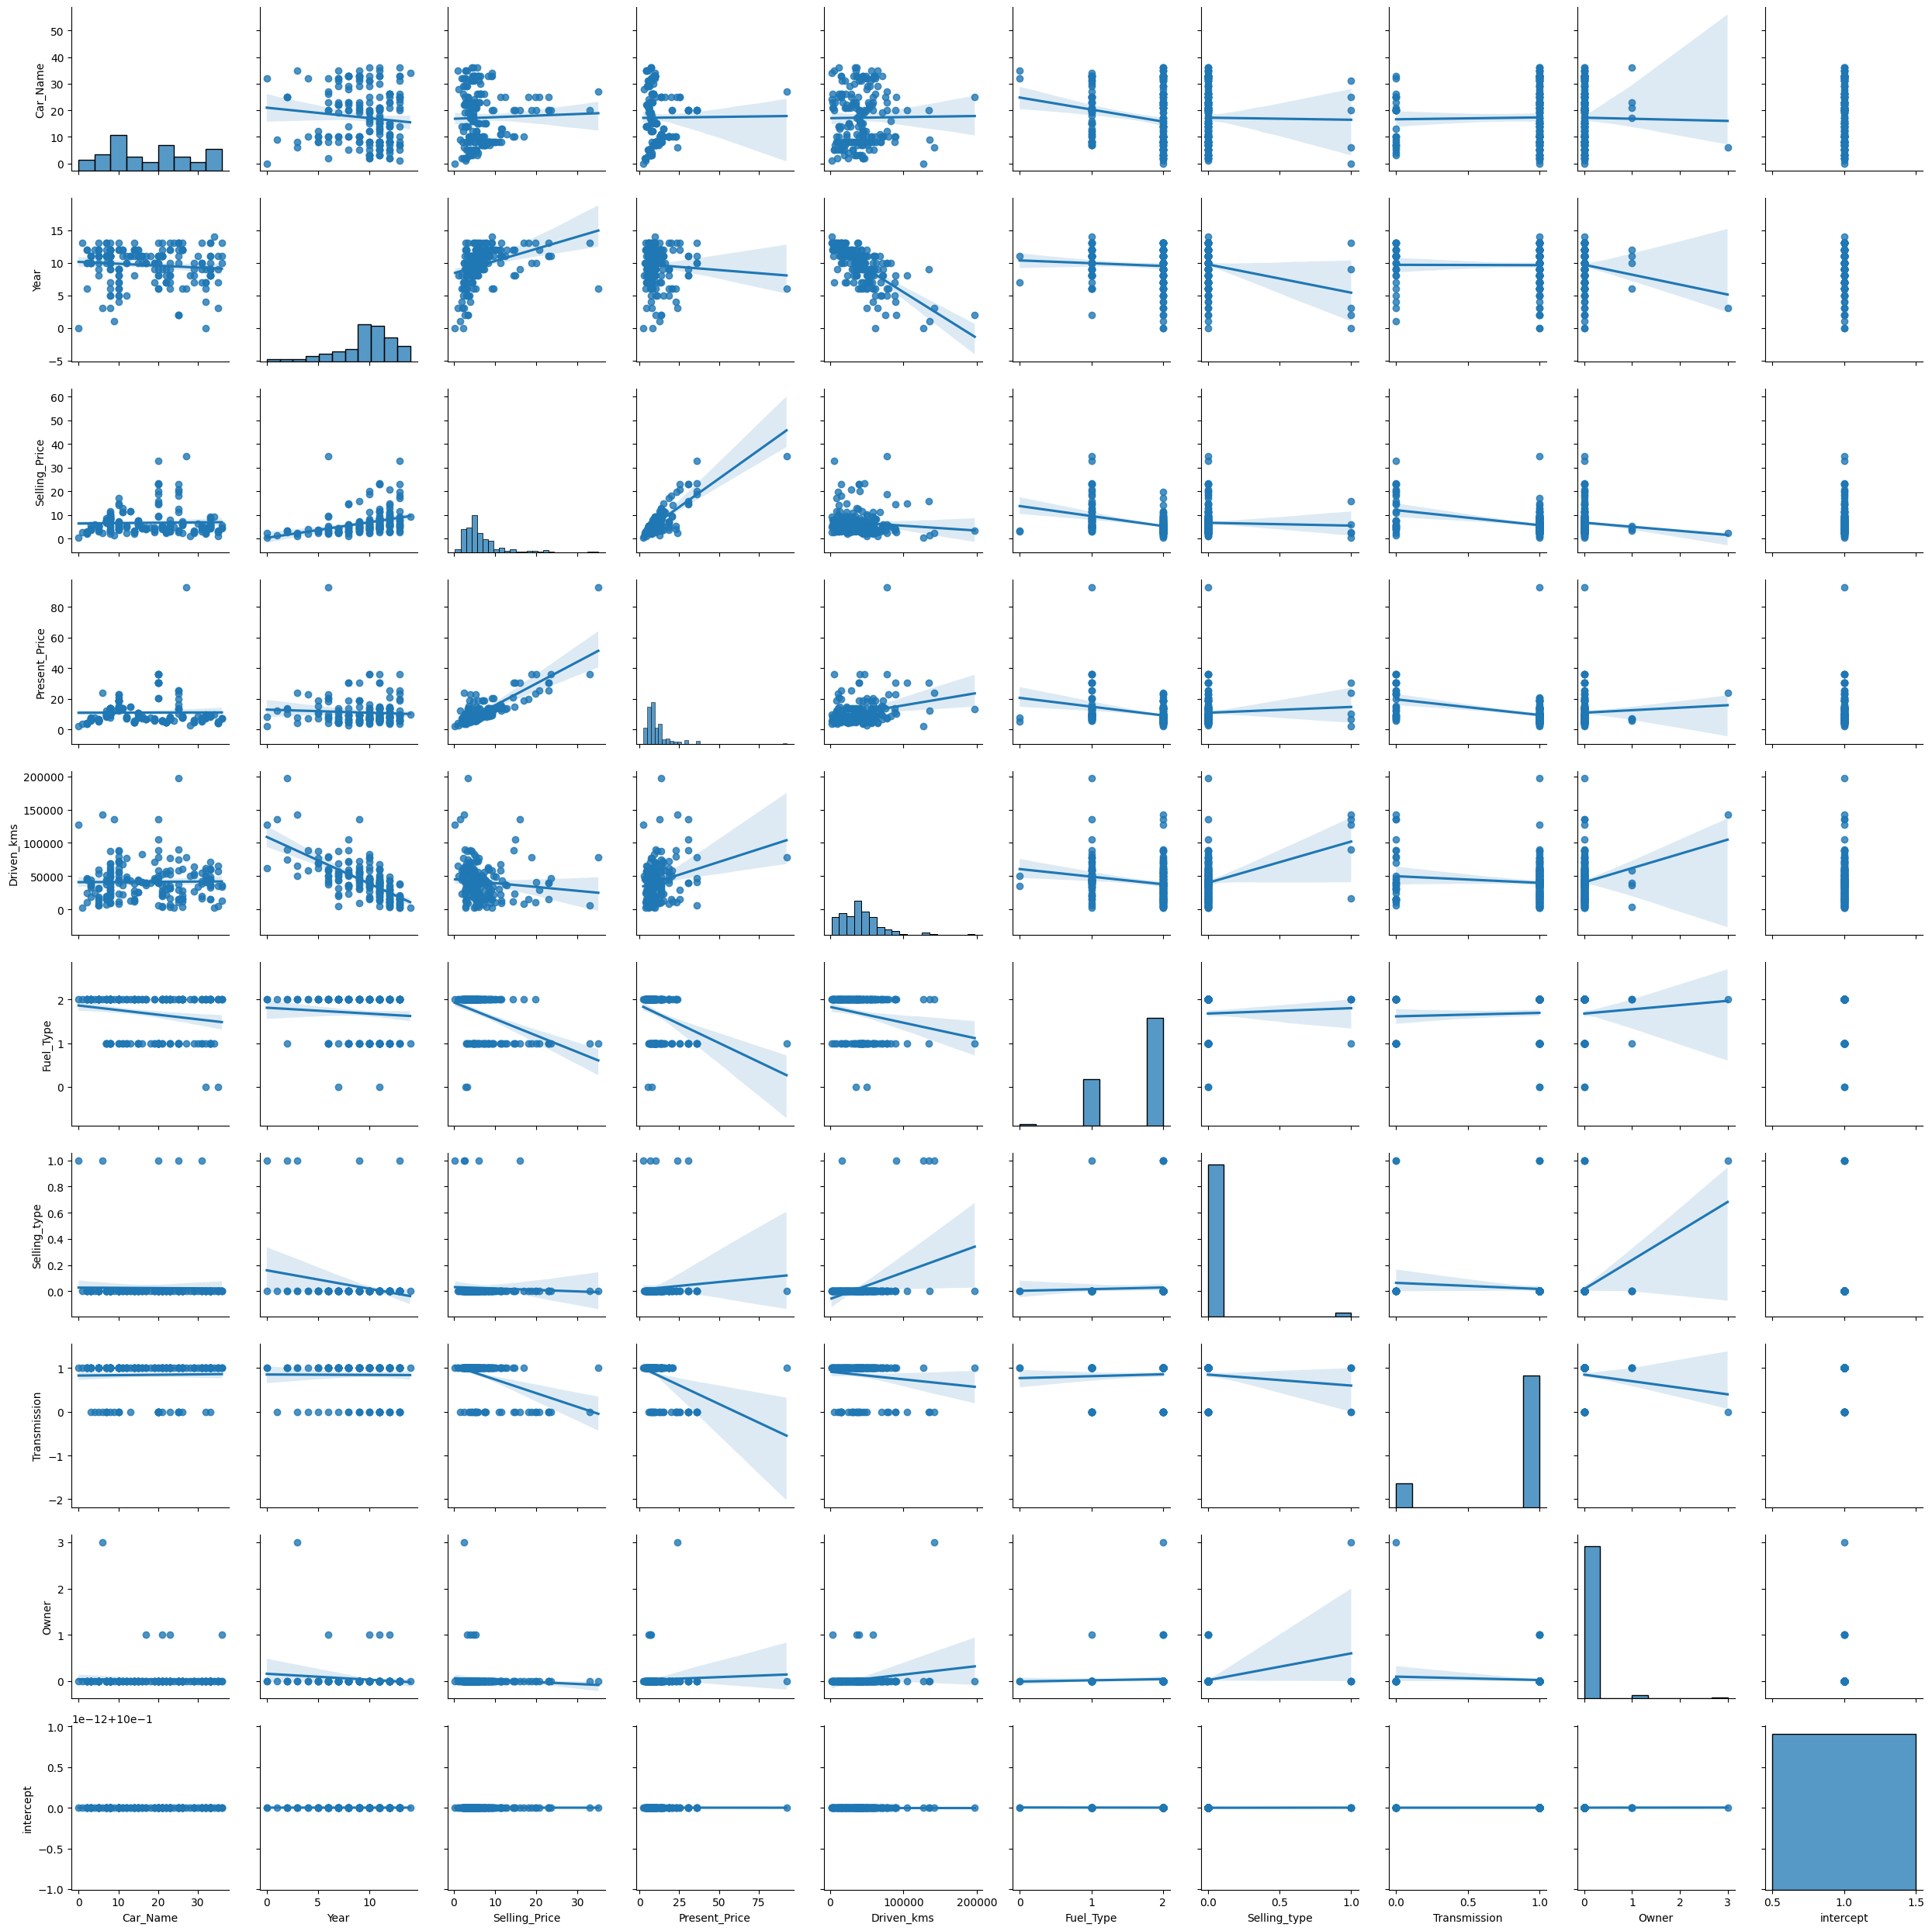

In [ ]:
corr_c = df_c
sns.pairplot(corr_c,kind = 'reg')
plt.tight_layout()

Text(0.5, 1.0, 'correlation between numerical values')

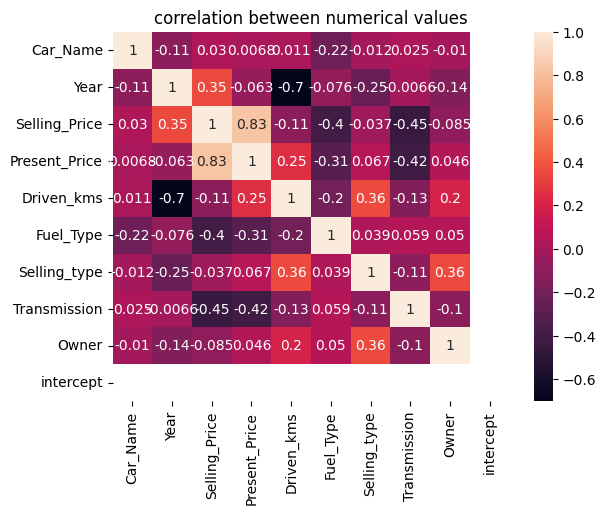

In [ ]:
#heatmap
sns.heatmap(corr_c.corr(), annot =True)
plt.title('correlation between numerical values')

In [ ]:
lm = sm.OLS(df_c['Selling_Price'], df_c[['intercept', 'Present_Price','Driven_kms','Transmission','Fuel_Type','Year']])
result_c = lm.fit()
result_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     279.1
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           1.50e-86
Time:                        23:02:22   Log-Likelihood:                -400.76
No. Observations:                 200   AIC:                             813.5
Df Residuals:                     194   BIC:                             833.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         2.4915      1.322      1.885      0.061      -0.116       5.099
Present_Price     0.4502      0.017     26.277      0.000       0.416       0.484
Driven_kms    -2.999e-05    7.3e-06     -4.107      0.000   -4.44e-05   -1.56e-05
Transmission     -1.8884      0.396     -4.766      0.000      -2.670      -1.107
Fuel_Type        -1.6924      0.295     -5.729      0.000      -2.275      -1.110
Year              0.5124      0.070      7.291      0.000       0.374       0.651
==============================================================================
Omnibus:                       45.849   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.925
Skew:                           0.789   Prob(JB):                     6.37e-44
Kurtosis:                       7.624   Cond. No.                     5.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
dc = df_c[['Present_Price','Driven_kms','Transmission','Fuel_Type','Year']]
z= dc.iloc[:,:].values
w= df_c.iloc[:,2].values

In [ ]:
z_train , z_test , w_train , w_test = train_test_split(z,w , test_size=0.1 , random_state=28)

In [ ]:
# create an instance
regressor = LinearRegression()

# training model using fit method
regressor.fit(z_train,w_train)

LinearRegression()

In [ ]:
w_pred = regressor.predict(z_test)
print(w_pred)

[ 9.42057134  2.13178066  2.20472606  5.85613717  5.10493284  7.93273367
  6.77397313  5.48297012  2.0980597   4.55039885  4.83871671  7.63878902
 20.72824941  1.11339378  7.14746194  9.68560619 12.3567842   7.00956165
 18.88184505  8.82024909]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(w_test, w_pred)
mae = mean_absolute_error(w_test, w_pred)
rmse = np.sqrt(mse)
r2 = r2_score(w_test, w_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 1.8204051708023363
MAE: 1.0260358158494423
RMSE: 1.3492239142567612
R-squared: 0.9394380969616356


**LR on Car Data with R2 of 93.9%**